In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import random
import requests as rq
import json
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
from empath import Empath
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import pyLDAvis
import pyLDAvis.gensim
import operator
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout
import csv

In [2]:
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='../Logs/ReplyTopicGraphs.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [3]:

Allgraphs_SW = "../Data/reddit_suicideWatch/SW_allValidThreads_graphs/SW_Allvalid_Graphs_Depth_fixed.pkl"
# Allgraphs_BL2 = "../Data/reddit_TheDonald/theDonald_graph/TheDonald_replygraphs.pkl"
Allgraphs_BL = "../Data/FrontPage/graphs/frontPage_replygraphs_50k.pkl"

In [4]:
Graphs_SW = pkl.load(open(Allgraphs_SW,'rb'))

In [5]:
allGraphs_SW = {}
for k in Graphs_SW:
#     print k
    if len(Graphs_SW[k]) > 10:
        allGraphs_SW[k] = Graphs_SW[k]
        

In [6]:
Graphs_BL = pkl.load(open(Allgraphs_BL,'rb'))

In [7]:
allGraphs_BL = {}
for k in Graphs_BL:
    if len(Graphs_BL[k].nodes()) > 10:
        allGraphs_BL[k] = Graphs_BL[k]
        

In [8]:
len(allGraphs_SW) , len(allGraphs_BL)

(11437, 36080)

In [9]:
def sampleGraphs(graphDict, sampleSize):
    sampled = {}
    keys = graphDict.keys()
    sampledKeys = random.sample(keys,sampleSize)
    for k in sampledKeys:
        sampled[k] = graphDict[k]
    return sampled

In [10]:
# sampled_BL = sampleGraphs(allGraphs_BL,len(allGraphs_SW))
sampled_BL = pkl.load(open("../Data/sampled_BL_reply.pkl",'rb'))
sampled_SW = allGraphs_SW #sampleGraphs(allGraphs_SW,10000)

In [11]:
import csv
def writeTextDict(textDict,fileName):
    fieldnames = ['postid', 'text']
    with open(fileName, 'wb') as output_file:
        dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        dict_writer.writeheader()
        for k in textDict:
            dict_writer.writerow({'postid': k , 'text': textDict[k]})


def getTextDict(replyGraphs):
    textDict = {}
    for k in replyGraphs:
        postText = nx.get_node_attributes(replyGraphs[k],'text')
        textDict.update(postText)
    return textDict

In [12]:
textDict_SW = getTextDict(sampled_SW)

textDict_BL = getTextDict(sampled_BL)

In [13]:
len(textDict_SW), len(textDict_BL)

(232336, 897673)

In [14]:
# writeTextDict(textDict_BL,'../Data/FrontPage/FP_Alltext_V4.csv')

In [15]:
# writeTextDict(textDict_SW,'../Data/reddit_suicideWatch/SW_Alltext_V3.csv')

In [16]:
def readModeratorFile(f):
    modIds = []
    modMeta = []
    js = json.load(open(f,'rb'))
    data = js['data']['children']
    for k in data:
        modIds.append(k['name'])
        modMeta.append(k)
    return modIds, modMeta

In [17]:
SW_mods, SW_modMeta = readModeratorFile("../Data/reddit_suicideWatch/moderators.json")

In [18]:
print SW_mods, len(SW_mods)

[u'S2S2S2S2S2', u'qgyh2', u'Psy-Kosh', u'SicSemperHumanus', u'SQLwitch', u'UnDire', u'pkbooo', u'skyqween', u'MykeeB', u'circinia', u'svabhava-sunya', u'sofar1776'] 12


In [19]:
SW_modMeta[1]

{u'author_flair_css_class': None,
 u'author_flair_text': None,
 u'date': 1230644033.0,
 u'id': u't2_1uzpp',
 u'mod_permissions': [u'all'],
 u'name': u'qgyh2'}

In [20]:
import datetime
times = [datetime.datetime.fromtimestamp(int(k['date'])).strftime('%Y-%m-%d %H:%M:%S')  for k in SW_modMeta  ]

In [21]:
print times

['2008-12-16 13:46:24', '2008-12-30 13:33:53', '2010-01-10 17:51:57', '2010-09-09 08:16:49', '2010-09-16 04:17:50', '2011-12-11 21:53:18', '2012-02-08 01:47:35', '2012-09-16 21:45:42', '2013-11-17 13:10:44', '2014-06-05 02:57:29', '2014-07-08 12:15:35', '2017-11-12 00:53:36']


In [22]:
AS_mods = readModeratorFile("../Data/reddit_TheDonald/moderators.json")

In [23]:
print AS_mods , len(AS_mods)

([u'shadowman3001', u'Grakmarr', u'US2A', u'sublimeinslime', u'Trumpshaker', u'zettapede', u'thunderbert80', u'Ivaginaryfriend', u'Foss_is_Boss', u'mivvan', u'Katfish29', u'IanPatrick1966', u'lalicat', u'Trumpropriation', u'Knollsit', u'richmomz', u'SportzStar', u'lolmonger', u'MorePancakes', u'D4rkd3str0yer', u'Sanotsuto', u'bh506407', u'pm_me_yo_doggos', u'CovfefeBucks', u'eGOTheJudge', u'DrWeeGee', u'Keln78', u'DanWofSoc', u'BotForceOne', u'AutoModerator', u'Medically', u'Velostodon'], [{u'author_flair_css_class': u'tomahawkmissile', u'author_flair_text': u'MHM', u'mod_permissions': [u'all'], u'date': 1495507695.0, u'id': u't2_5y6sb', u'name': u'shadowman3001'}, {u'author_flair_css_class': u'treadonme', u'author_flair_text': u'1776', u'mod_permissions': [u'all'], u'date': 1508277635.0, u'id': u't2_a9f6l', u'name': u'Grakmarr'}, {u'author_flair_css_class': u'captain', u'author_flair_text': u'MAGA', u'mod_permissions': [u'all'], u'date': 1508277639.0, u'id': u't2_uuiui', u'name': u'US

In [24]:
# LIWC_BL2 = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_TheDonald/LIWC2015_TheDonaldTop.csv")
LIWC_BL = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/FrontPage/LIWC2015_FP_Alltext_V4.csv")
# LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC2015_SWTextComplete.csv")
LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC_SW_Alltext_V2.csv")

In [25]:
LIWC_SW.keys()

Index([u'A', u'B', u'WC', u'Analytic', u'Clout', u'Authentic', u'Tone', u'WPS',
       u'Sixltr', u'Dic', u'function', u'pronoun', u'ppron', u'i', u'we',
       u'you', u'shehe', u'they', u'ipron', u'article', u'prep', u'auxverb',
       u'adverb', u'conj', u'negate', u'verb', u'adj', u'compare', u'interrog',
       u'number', u'quant', u'affect', u'posemo', u'negemo', u'anx', u'anger',
       u'sad', u'social', u'family', u'friend', u'female', u'male', u'cogproc',
       u'insight', u'cause', u'discrep', u'tentat', u'certain', u'differ',
       u'percept', u'see', u'hear', u'feel', u'bio', u'body', u'health',
       u'sexual', u'ingest', u'drives', u'affiliation', u'achieve', u'power',
       u'reward', u'risk', u'focuspast', u'focuspresent', u'focusfuture',
       u'relativ', u'motion', u'space', u'time', u'work', u'leisure', u'home',
       u'money', u'relig', u'death', u'informal', u'swear', u'netspeak',
       u'assent', u'nonflu', u'filler', u'AllPunc', u'Period', u'Comma',
     

In [26]:
print len(LIWC_SW) , len(LIWC_BL)

419554 2932701


In [27]:
LIWC_SW.drop(LIWC_SW.index[0])
LIWC_BL.drop(LIWC_BL.index[0])
# LIWC_BL2.drop(LIWC_BL2.index[0])

A                                                  B   WC  \
1        t1_duqxily  None if them has won gold (only other medals) ...   31   
2        t1_dumknhz  suppose if china is going to artificially lowe...   32   
3        t1_dumknhd      Look at Chicago, what more proof do you need?    9   
4        t1_dupg974                                        Stationery*    1   
5        t1_duljt22  Isso me incomoda muito.Gaste 300 reais pra com...   31   
6        t1_durb5jy  Because the majority of people living in the c...   20   
7        t1_duit3vg  My pc is too trash  to record and play at a st...   26   
8        t1_dv6ur8x  The boy who held back the sea. Basically a you...   58   
9        t1_dujrr20  That you don't just wake up in a parallel univ...   16   
10       t1_dumek8p  God, do these people have *no* shame?  Why in ...   69   
11       t1_dumek8q  Bit harder for a non-US citizen. We need your ...   36   
12       t1_dv97qmb                            OP finally got pussy.      4   
13       t1_dv4ywam  If I could figure out how to give gold you wou...   18   
14       t1_dv97qmf                               Swiss Mathematician?    2   
15        t3_7ymlcg                                                NaN    0   
16       t1_dv4ywah  Oh man this comment got me good.  Thanks you p...   15   
17       t1_duljt2i  Happened to me yesterday with the same gun! Th...   33   
18       t1_dupg97a  they didn't shout anti bjp slogans they shoute...   20   
19       t1_dunkwfc                             Oh shit dude sorry...     4   
20       t1_dunkwfb  Maybe you should go into electrical repair, yo...   15   
21       t1_duuvx6r  That's why I lowkey think it'll be revealed co...   36   
22       t1_dupg97g  That's one way for a kid to start getting moni...   10   
23       t1_dv82pa9  No plans to change up WAYWT - Mon/Fri are sort...   18   
24       t1_duljt2b  What if the bit about him receiving/using a ch...  115   
25       t1_dunkwfk                       This is awesome!  Thank you!    5   
26       t1_dunkwfj  I like it too - not for my pale ass self, but ...   24   
27       t1_duljt2g  It's generally considered a multi day climb an...   39   
28       t1_dv1pmh1  There arent a lot of 104 custom boards around ...   21   
29       t1_dupg97r  Shoulds don't matter much.Schools *are* being ...   13   
30       t1_dupg97y  Urging someone to listen is definitely differe...   59   
...             ...                                                ...  ...   
2932671  t1_dutyr9q         On advice of council I am pleading a fifth    9   
2932672  t1_duqwvp8  I cant believe i had to scroll down this far t...   16   
2932673  t1_dv55pxg  Were you expecting a rebuttal? Your post made ...   92   
2932674  t1_duv9ga2  I think you should look harder at other aspect...   20   
2932675  t1_duki7f1  2.66 is actually not terrible.  Field journals...   36   
2932676  t1_duv9ga6                    Could ironically call it George    5   
2932677  t1_duv9ga9  After last year, Viru wanted an Indian captain...   29   
2932678  t1_dv8p634                              Anyone remember AMES?    3   
2932679  t1_duskjj5                            It's Ewan McGregor then    4   
2932680  t1_duskjj4  I'm gonna be honest I could barely hear the ly...   17   
2932681  t1_dvaqiut  You got the second part correctly but the firs...  118   
2932682  t1_duvdr9k  Simmons is shooting 56% from the FT line and h...   41   
2932683  t1_duwhdoi                                     to the top sir    4   
2932684  t1_duvdr9l                                             Probs?    1   
2932685  t1_dv6l7du  Firstly, he didn't steal anything. There was l...   26   
2932686  t1_dupyuai                                  40 oz. to freedom    4   
2932687  t1_dv6l7dw                        It's almost a perfect loop.    5   
2932688  t1_dupyuak  No. It's far easier to sell yourself than to k...   23   
2932689  t1_dujzp8u  Flush the casings out completely.  I flush the.

In [28]:
def createAffectDict(LIWC):
    affectDict = {}
    for index , row in LIWC.iterrows():
        #affectDict[row['A']] =row['posemo'] - row['negemo']
        affectDict[row['A']] =row['Tone']
    return affectDict

def updateAffects(graphs , affectDict):
    for g in graphs:
        updateDict = {}
        for n in graphs[g].nodes():
            if n not in affectDict:
                continue
            updateDict[n] = affectDict[n]
        nx.set_node_attributes(graphs[g] , 'affects' , updateDict)

def getScaledSizes(graph):
    affects = nx.get_node_attributes(graph, 'affects')
    s = [int(affects[v]) for v in graph.nodes()]
    normed = [i + 10 for i in s]
    scaled = [v*(2^(v-np.min(normed)))+100 for v in normed]
    return scaled

def createUserGraphs(allGraphs,deletedUsers=None):
    userGraphs = {}
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=1 )
            else:
                userGraph[src][dst]['weight'] += 1
        userGraphs[i] = userGraph
    return userGraphs

def drawReplyGraph(graph):
    cascadeGraph = graph
    sizes = getScaledSizes(cascadeGraph)
    pos = graphviz_layout(cascadeGraph, prog='neato')

    usr = list(set(nx.get_node_attributes(cascadeGraph, 'author').values()))
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in cascadeGraph:
        c = usr.index(cascadeGraph.node[node]['author'])
        colorMap.append(color[c])
        lls[node] = cascadeGraph.node[node]['author']
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    nx.draw(cascadeGraph,pos=pos ,node_size=sizes ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

In [29]:
affectDict_SW = createAffectDict(LIWC_SW)
affectDict_BL = createAffectDict(LIWC_BL)

In [30]:
updateAffects(sampled_SW,affectDict_SW)

In [31]:
updateAffects(sampled_BL,affectDict_BL)

In [32]:
print len(sampled_SW) , len(sampled_BL)

11437 11437


In [33]:
def getAuthors(graphs):
    authors = {}
    for k in graphs:
        g = graphs[k]
        auth = nx.get_node_attributes(g,'author')
        for a in auth:
            if auth[a] in authors:
                authors[auth[a]]+=1
            else:
                authors[auth[a]]=1
    return authors

In [34]:
authCount_SW = getAuthors(sampled_SW)
authCount_BL = getAuthors(sampled_BL)

In [35]:
print max(authCount_SW.values()), max(authCount_BL.values())

41249 21774


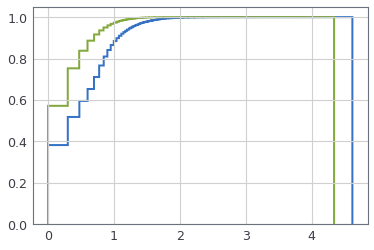

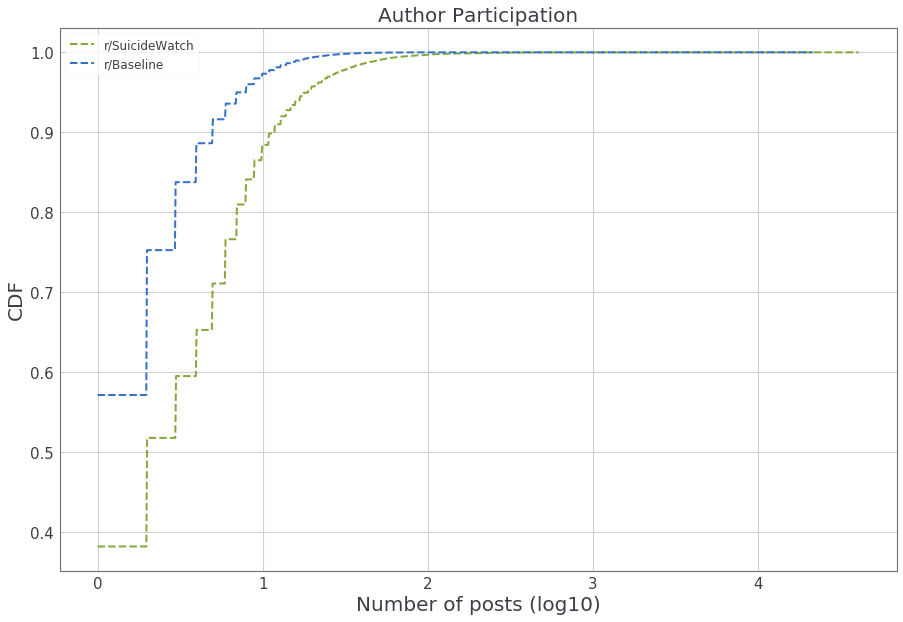

In [36]:
n1 , bins1 , patches1 = plt.hist(np.log10(authCount_SW.values()), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(authCount_BL.values()), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1, 'g--', linewidth=2)
ax.plot(bins2[:-1], n2, 'b--', linewidth=2)

plt.title("Author Participation", fontsize = 20)
plt.xlabel("Number of posts (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch' , 'r/Baseline'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [37]:
# sortedAuths_SW = sorted(authCount_SW.items(), key=operator.itemgetter(1))

# top1percent_SW = sortedAuths_SW[-(int(0.01*len(sortedAuths_SW))):-1]

# top1percent_SW_auths = [k[0] for k in top1percent_SW]

# print len(top1percent_SW_auths) , len(SW_mods)
# print float(len(list(set(top1percent_SW_auths).intersection(set(SW_mods)))))/float(len(top1percent_SW))

In [38]:
# top1percent_SW[-2]

In [39]:
sortedAuths_BL = sorted(authCount_BL.items(), key=operator.itemgetter(1))

top1percent_BL = sortedAuths_BL[-(int(0.01*len(sortedAuths_BL))):-1]

top1percent_BL_auths = [k[0] for k in top1percent_BL]

print len(top1percent_BL_auths) , len(AS_mods)
# print float(len(list(set(top1percent_BL_auths).intersection(set(AS_mods)))))/float(len(top1percent_BL))

3587 2


In [40]:
top1percent_BL[-2]

(u'WikiTextBot', 349)

In [41]:
sampled_BL[sampled_BL.keys()[19]].nodes(data=True)

[(u't1_dv2sitr',
  {'affects': 25.77,
   'author': u'Shiny_arr0wz',
   'depth': 0,
   'downs': 0,
   'text': 'l00000000l',
   'time': 1520008555.0,
   'ups': 2}),
 (u't1_dv302d0',
  {'affects': 1.0,
   'author': u'Someone9339',
   'depth': 0,
   'downs': 0,
   'text': ' #stealhislook',
   'time': 1520015525.0,
   'ups': 4}),
 (u't1_dv2zrk8',
  {'affects': 1.0,
   'author': u'Hsky12',
   'depth': 2,
   'downs': 0,
   'text': 'Yeah I was worried there for a second. 750kcal drink is insane ',
   'time': 1520015248.0,
   'ups': 3}),
 (u't1_dv3d2rn',
  {'affects': 99.0,
   'author': u'Drox01',
   'depth': 3,
   'downs': 0,
   'text': '&gt; s Yeah oh well',
   'time': 1520028018.0,
   'ups': 1}),
 (u't1_dv3epb4',
  {'affects': 25.77,
   'author': u'Tuss1n',
   'depth': 2,
   'downs': 0,
   'text': 'Is said BLACK. Not black ',
   'time': 1520029739.0,
   'ups': -3}),
 (u't1_dv3jhpi',
  {'affects': 99.0,
   'author': u'Fercopp',
   'depth': 4,
   'downs': 0,
   'text': 'Oh well in my country t

In [42]:
# drawReplyGraph(sampled_SW[sampled_SW.keys()[151]])

In [43]:
# drawReplyGraph(sampled_BL[sampled_BL.keys()[151]])

In [44]:
userGraphs_SW = createUserGraphs(sampled_SW)

In [45]:
userGraphs_BL = createUserGraphs(sampled_BL)

In [46]:
len(userGraphs_BL), len(userGraphs_SW)

(11437, 11437)

In [47]:
def getSortedSizeDict(graphs):
    size = dict()
    for k in graphs:
        size[k] = len(graphs[k].nodes())
    sortedSizes = sorted(size.items(),key=operator.itemgetter(1))
    return sortedSizes

def getSampledResponses(replyGraphs , keys):
    responses = {}
    for k in keys:
        responses[k] = {}
        responses[k]['-1'] = tuple()
        responses[k]['0']  = []
        for n in replyGraphs[k].nodes(data=True):
            if n[1]['depth'] == -1:
                responses[k]['-1'] = n
            if n[1]['depth'] == 0:
                if n[1]['text'] != '[removed]':
                    if len(n[1]['text']) > 20:
                        responses[k]['0'].append(n)
    return responses
            
            
        

In [48]:
sortedReplyGraphs = getSortedSizeDict(sampled_SW)

In [49]:
sorted_responses= getSampledResponses(sampled_SW,[k[0] for k in sortedReplyGraphs[7000:7020]])

In [50]:
# fieldnames = ['postId', 'postDepth','author','text']
# with open("RinaSampleV2.csv", 'wb') as output_file:
#     dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
#     dict_writer.writeheader()
#     for k in sorted_responses:
#         root_resp = sorted_responses[k]['-1'][1]
#         dict_writer.writerow({'postId': k , 'postDepth': 'root' , 'author': root_resp['author'] , 'text' : root_resp['text']})
#         for r in sorted_responses[k]['0']:
#             dict_writer.writerow({'postId': k , 'postDepth': 'first_response' , 'author': r[1]['author'] , 'text' : r[1]['text']})


In [51]:
# g = (allGraphs_SW[sortedReplyGraphs[-1][0]])
# for n in g.nodes(data=True):
#      if n[1]['depth'] == 0:
#          print n

In [52]:
# drawReplyGraph(sampled_SW[sortedReplyGraphs[-1][0]])

22


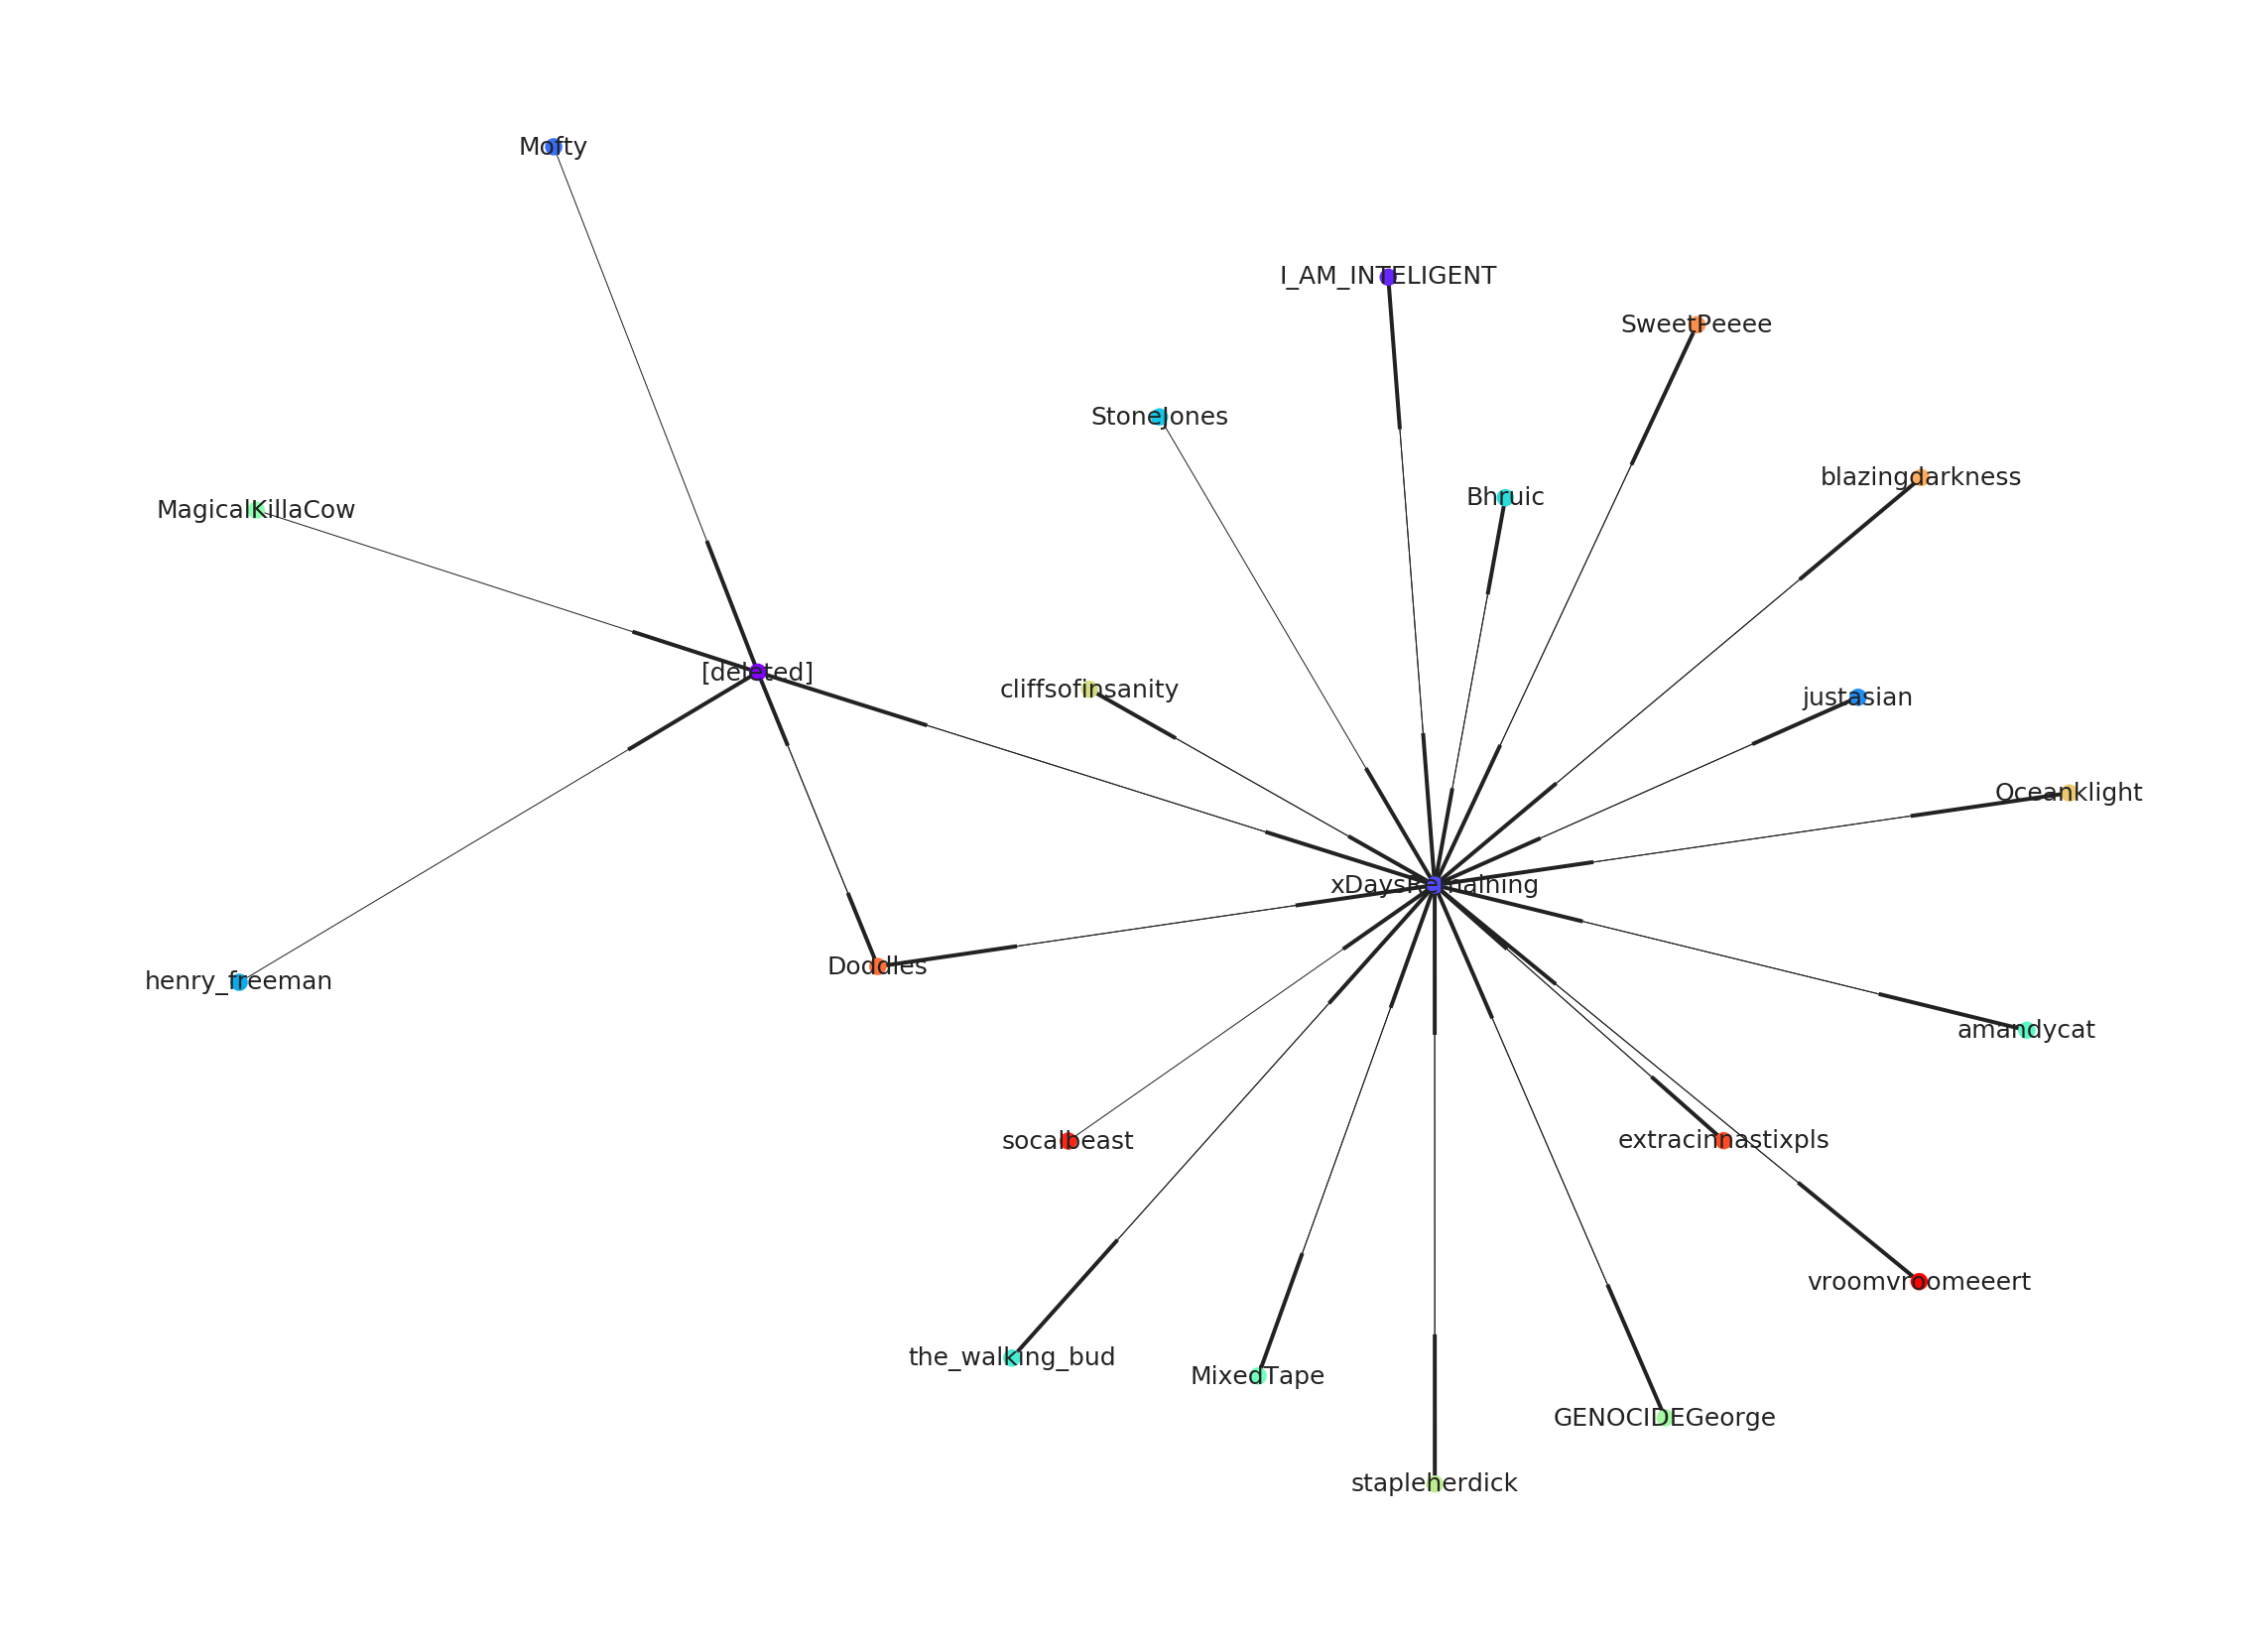

In [53]:
drawUserGraph(userGraphs_SW[sortedReplyGraphs[-1][0]])

In [54]:
# Save sampled Reply Graphs: 
# with open("../Data/SW_ReplyGraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=sampled_SW)

In [55]:
# with open("../Data/BL_ReplyGraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=allGraphs_SW)

In [56]:
#Save sampled USer Graphs: 
# with open("../Data/FrontPage/SW_ugraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=userGraphs_SW)

In [57]:
#Save sampled USer Graphs: 
# with open("../Data/FrontPage/FP_ugraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=userGraphs_BL)

33


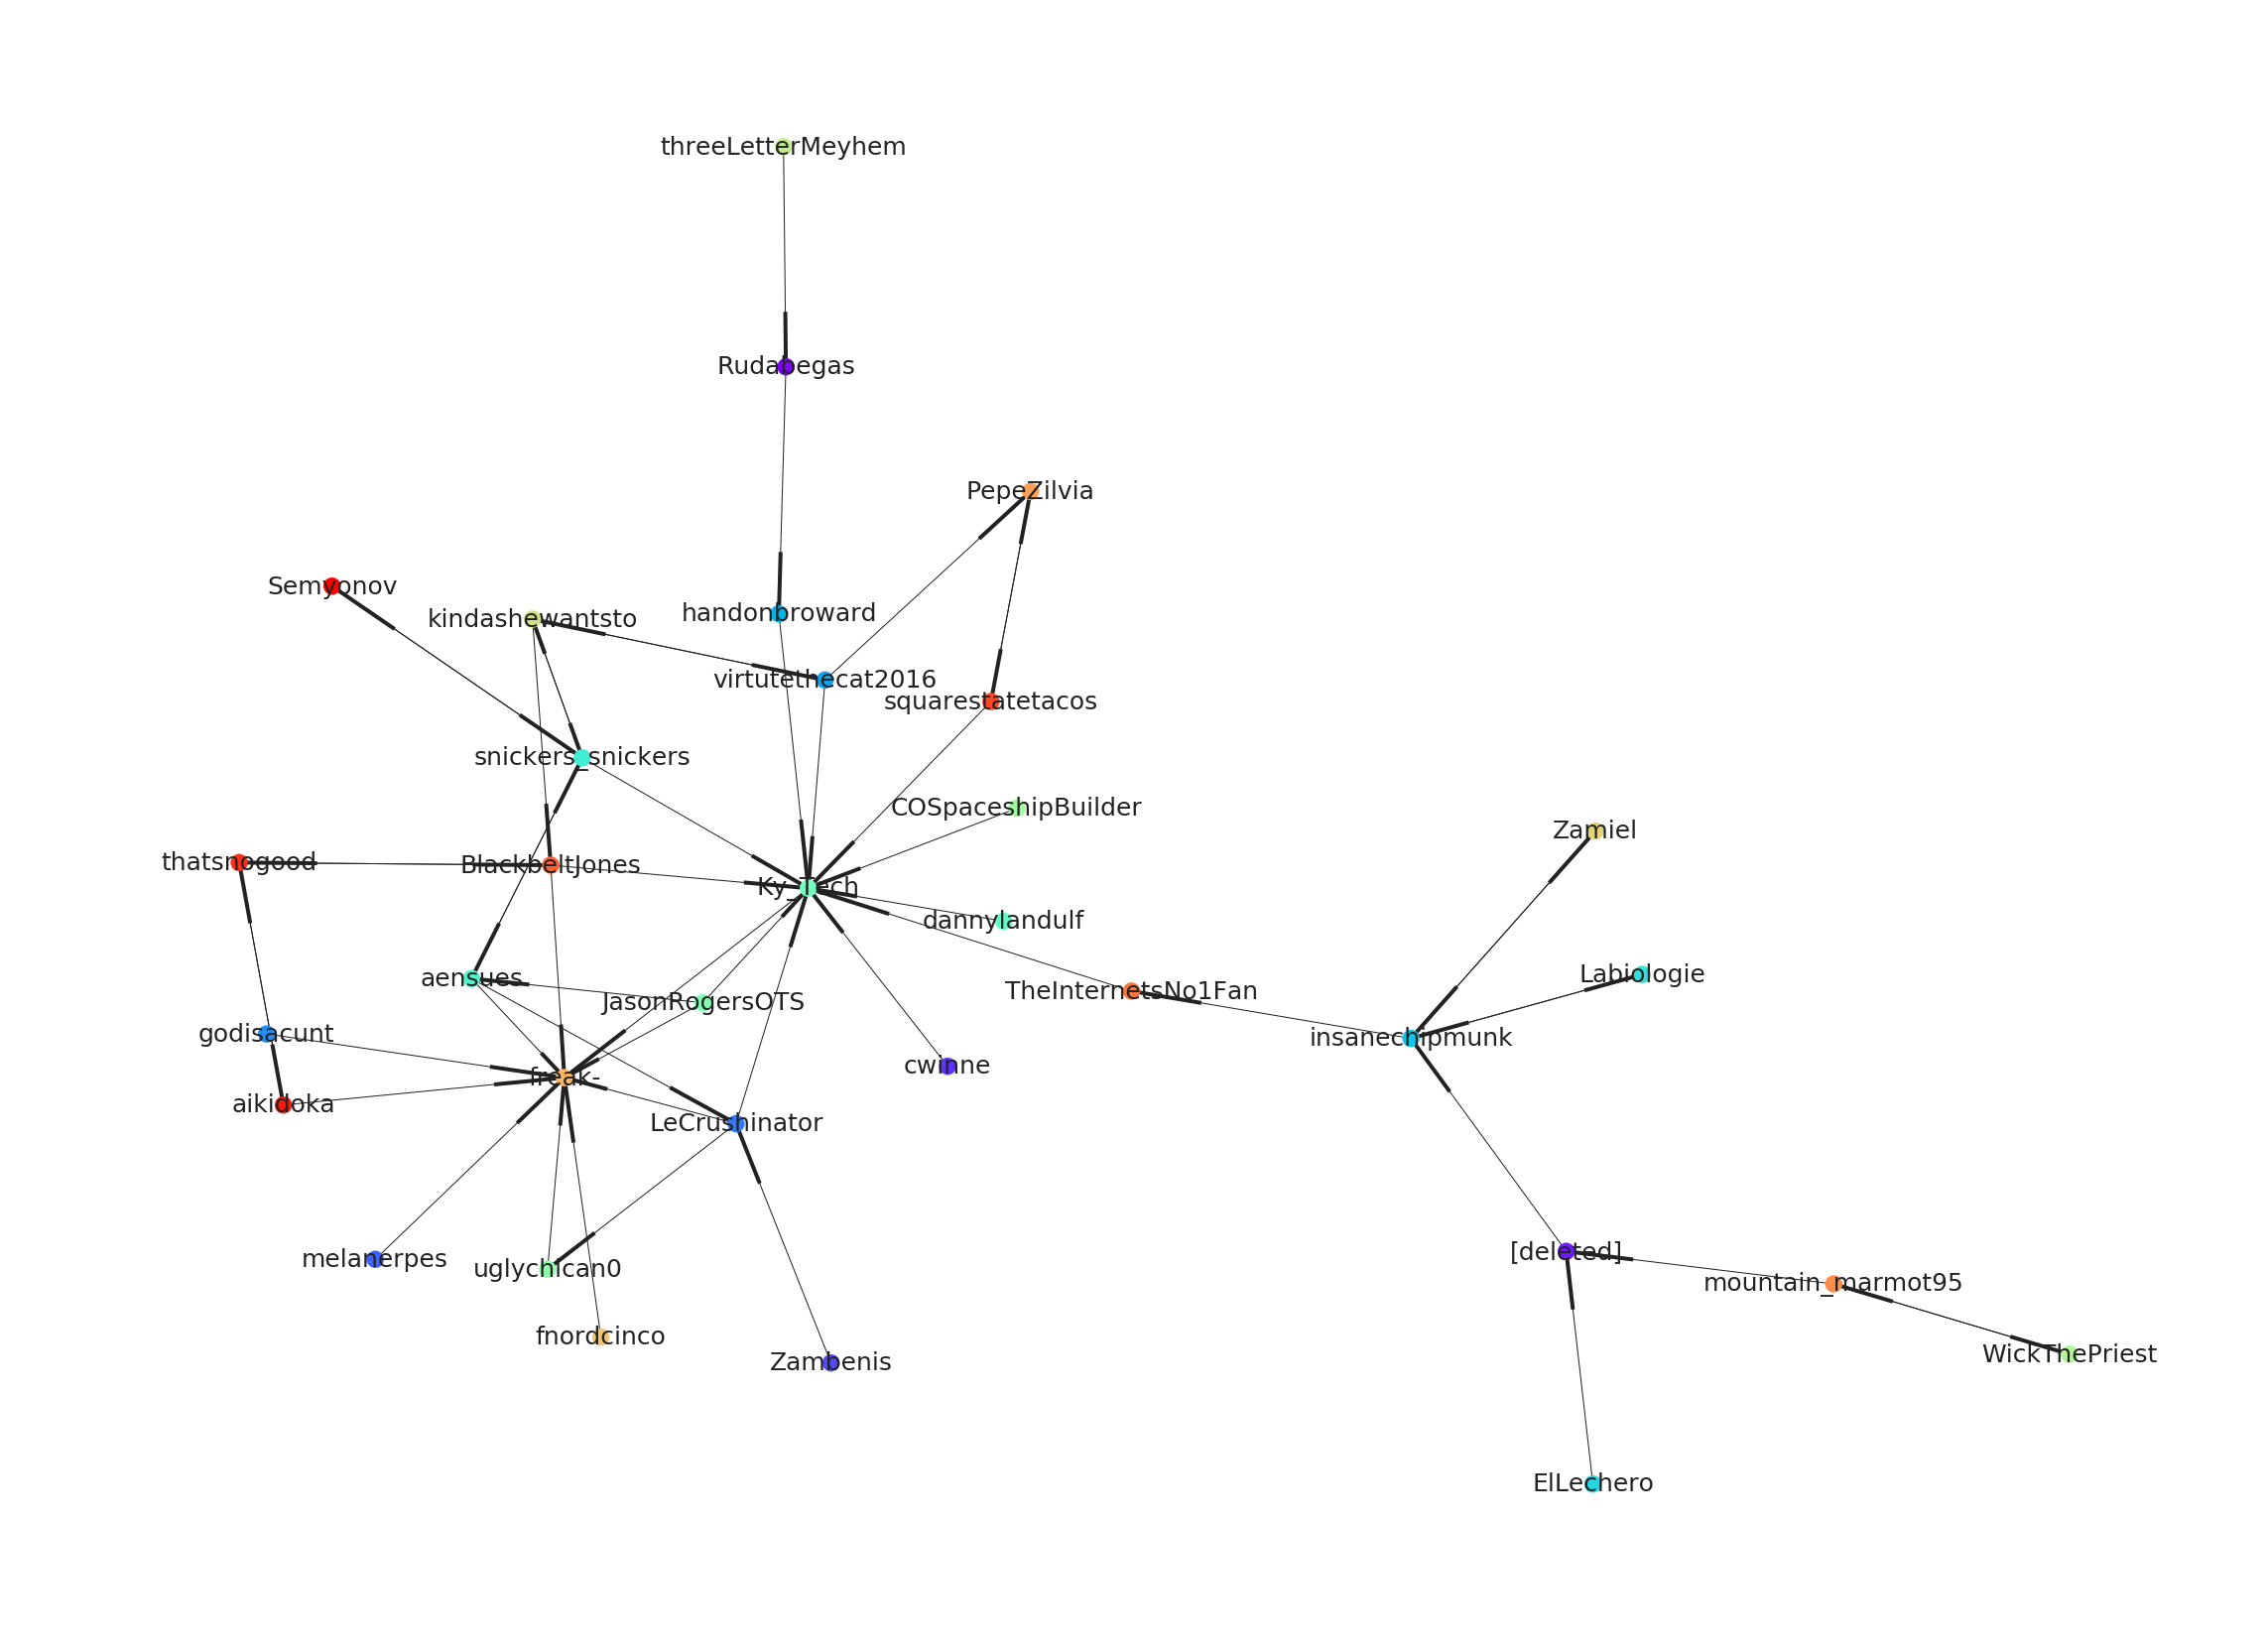

In [58]:
drawUserGraph(userGraphs_BL[sampled_BL.keys()[160]])

In [59]:
# drawUserGraph(userGraphs_SW[sampled_SW.keys()[160]])

In [60]:
# drawUserGraph(userGraphs_BL[allGraphs_BL.keys()[1]])

In [61]:
def getRootauthors(replyGraphs):
    rootAuthors = {}
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'depth' in g.node[node]:
                if g.node[node]['depth'] == -1:
                    rootAuthors[k] =  g.node[node]['author']
    return rootAuthors

def filterDeletedOPGraphs(userGraphs,opAuthors):
    print len(opAuthors) , len(userGraphs)
    filteredUserGraphs = {}
    for g in userGraphs:
        if opAuthors[g] != '[deleted]':
            filteredUserGraphs[g] = userGraphs[g]
    return filteredUserGraphs

In [62]:
opAuthors_SW = getRootauthors(sampled_SW)
opAuthors_BL = getRootauthors(sampled_BL)

In [63]:
len(opAuthors_SW) , len(opAuthors_BL)

(11437, 11437)

In [64]:
# with open("BL_opAuthors_sampled.pkl",'w') as f:
#     pkl.dump(file=f,obj=opAuthors_BL)

In [65]:
# with open("SW_opAuthors_sampled.pkl",'w') as f:
#     pkl.dump(file=f,obj=opAuthors_SW)

In [66]:
filteredUGraphs_SW = filterDeletedOPGraphs(userGraphs_SW,opAuthors_SW)
filteredUGraphs_BL = filterDeletedOPGraphs(userGraphs_BL,opAuthors_BL)

11437 11437
11437 11437


In [67]:
# %store -r filteredUGraphs_BL

In [68]:
print len(filteredUGraphs_BL) , len (filteredUGraphs_SW)

11070 10527


In [69]:
filteredReply_SW = {}
for k in filteredUGraphs_SW:
    filteredReply_SW[k] = sampled_SW[k]
    
filteredReply_BL = {}
for k in filteredUGraphs_BL:
    filteredReply_BL[k] = sampled_BL[k]

In [70]:
len(filteredReply_SW) , len(filteredReply_BL)

(10527, 11070)

In [71]:
#Save sampled USer Graphs: 
# with open("../Data/SW_Sampled_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=sampledUgraphs_SW)
    

# with open("../Data/AS_Sampled_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredUGraphs_BL)

In [72]:
# with(open("SW_OpAuthors_2.pkl",'wb')) as f:
#     pkl.dump(opAuthors_SW,f)

# with(open("BL_OpAuthors_2.pkl",'wb')) as f:
#     pkl.dump(opAuthors_BL,f)

In [73]:
def getDegreeDist(graphs):
    degrees = []
    for g in graphs:
        dist = nx.degree(graphs[g]).values()
        degrees = degrees + [k+1 for k in dist]
    return degrees

def getDepths(replygraphs):
    depths = []
    for g in replygraphs:
        depth = nx.get_node_attributes(replygraphs[g],'depth')
        depths = depths + [depth[k] for k in depth]
    return depths
        

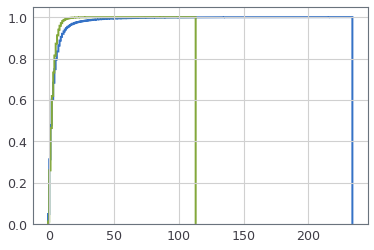

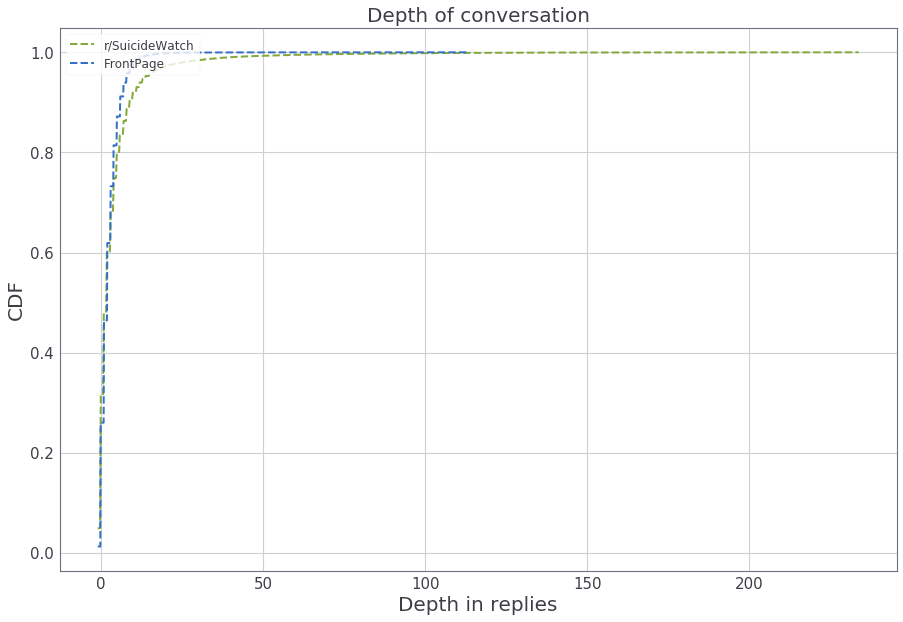

In [74]:
n1 , bins1 , patches1 = plt.hist(getDepths(filteredReply_SW), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(getDepths(filteredReply_BL), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'g--', linewidth=2)
ax.plot(bins2[:-1], n2, 'b--', linewidth=2)
plt.title("Depth of conversation", fontsize = 20)
plt.xlabel("Depth in replies",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','FrontPage'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [75]:
from scipy.stats import mannwhitneyu
def findMannWhitney(vec1 , vec2):
    if len(vec1) > len(vec2):
        vec1 = random.sample(vec1 , len(vec2))
    elif len(vec2) > len(vec1): 
        vec2 = random.sample(vec2 , len(vec1))
    else:
        print "Samples are same size, no need to resample"
    statistic , pvalue = mannwhitneyu(vec1, vec2)
    return statistic, pvalue
        

In [76]:
print len(getDegreeDist(filteredReply_BL) ), len(getDegreeDist(filteredReply_SW))

stats , pvalue = findMannWhitney(getDegreeDist(filteredReply_SW) , getDegreeDist(filteredReply_BL))
normstats , normpvalue = findMannWhitney(getDegreeDist(filteredReply_SW) , getDegreeDist(filteredReply_SW))
print stats/normstats, pvalue

869181 214229
Samples are same size, no need to resample
0.853743314331 0.0


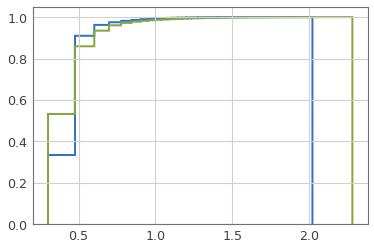

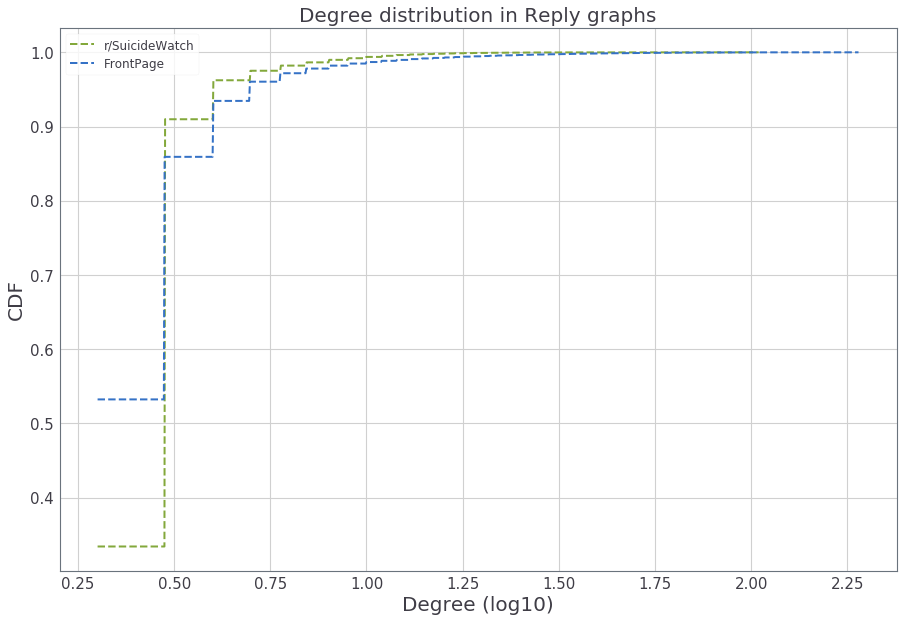

In [77]:
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(filteredReply_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredReply_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1, 'g--', linewidth=2)
ax.plot(bins2[:-1], n2, 'b--', linewidth=2)

plt.title("Degree distribution in Reply graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','FrontPage'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

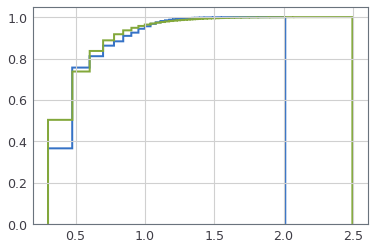

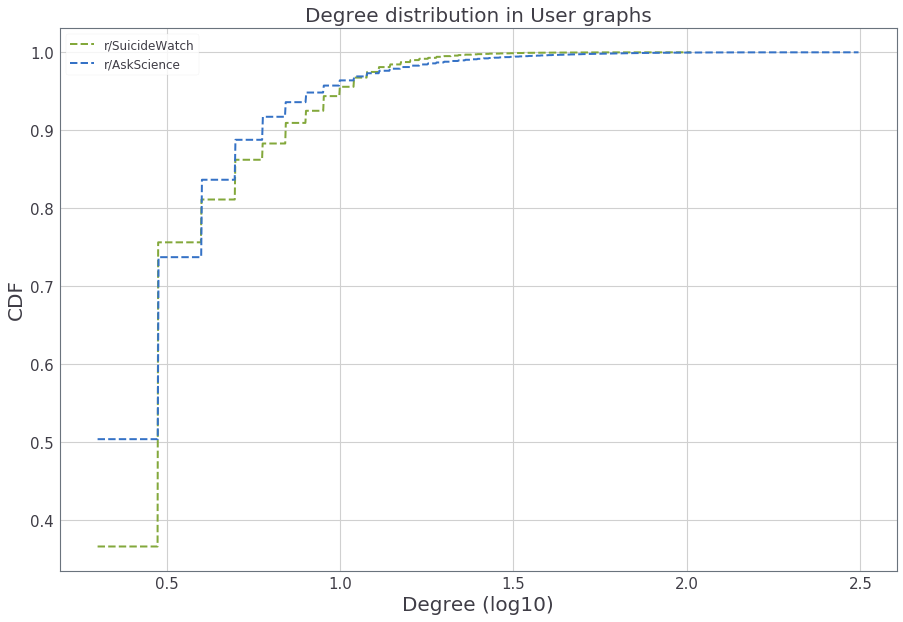

In [78]:
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'g--', linewidth=2)
ax.plot(bins2[:-1], n2, 'b--', linewidth=2)

plt.title("Degree distribution in User graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','r/AskScience'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [79]:
print len(getDegreeDist(filteredUGraphs_SW) ), len(getDegreeDist(filteredUGraphs_BL))

stats , pvalue = findMannWhitney(getDegreeDist(filteredUGraphs_SW) , getDegreeDist(filteredReply_BL))
print stats , pvalue
normstats , normpvalue = findMannWhitney(getDegreeDist(filteredUGraphs_SW) , getDegreeDist(filteredUGraphs_SW))
print stats/normstats, pvalue

68961 557200
1895171802.5 0.0
Samples are same size, no need to resample
0.797024149695 0.0


In [80]:


def getSymmetricBehaviour(filteredUserGraphs,opAuthors):
    messageParti = []
    userParti = []
    BPusers = {}
    for k in filteredUserGraphs:
        g = filteredUserGraphs[k]
        BPuser = 0
        BPmsges = 0

        BPusers[k] = []
        for (u,v) in g.edges():
            if u != v :          
                toMsgs = 0
                fromEdges = 0
                if v == opAuthors[k]:
                    if u in g[v]:
                        BPuser +=1
#                         print k , v , u
                        BPusers[k].append(u)
                        toMsgs = g.get_edge_data(u,v)['weight']
                        fromEdges = g.get_edge_data(v,u)['weight']
                        BPmsges= BPmsges + min(2*toMsgs,fromEdges)
        if len(g.nodes()) == 0:
#             print g.edges()
            continue
        userParti.append(float(BPuser)/float(len(g.nodes())))
        edgeWeights = sum([edge[2]['weight'] for edge in g.edges(data=True)])
        messageParti.append(float(BPmsges)/float(edgeWeights))
    return messageParti , userParti, BPusers

def getSymmetricOPResponses(replyGraphs , opAuthors):
    conversationChains = {}
    
    for k in replyGraphs:
        g = replyGraphs[k]
        authors = nx.get_node_attributes(g,'author')
        edges = g.edges()
        conversationChains[k] = {}
        conversationChains[k]['op'] = []
        conversationChains[k]['bp'] = []
        if opAuthors[k] == '[deleted]':
            continue
        for e in nx.dfs_edges(g):
            if k not in opAuthors:
                print "OP index not found"
                continue
            if e[1] not in authors or e[0] not in authors:
                print "Edge authors not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if g.node[e[1]]['text'] == '[deleted]':
                    continue
                conversationChains[k]['op'].append(g.node[e[1]])
                conversationChains[k]['bp'].append(g.node[e[0]])
    return conversationChains
                

def getTimeDistribution(replyGraphs,opAuthors):
    timeDist = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        for e in g.edges():
            if k not in opAuthors:
                print "Not the correct oplist "
                continue
            if e[1] not in authors:
                print "Author not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if e[0] in times:
                    timeDiff = times[e[0]] - times[e[1]]
                    if timeDiff == 0 or timeDiff < 0:
                        timeDiff = 1
                    timeDist.append(float(timeDiff)/60.0)
    return timeDist


def getAllTimeDifferences(replyGraphs):
    timeDiffs = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        for e in g.edges():
            if (e[0] not in times) or (e[1] not in times):
                print " Time not found"
                continue
                
            timeDiff = times[e[0]] - times[e[1]]
            if timeDiff == 0 or timeDiff < 0:
                timeDiff = 1
            timeDiffs.append(float(timeDiff)/60.0)
    return timeDiffs

def getSortedbyTimeEmotions(replyGraphs,opAuthors):
    timeDiff = []
    sentiDiff = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        sentiments = nx.get_node_attributes(g,'affects')
        opSenti = {}
        opTime = {}
        for n in g.nodes():
            if n not in authors:
                print "author not found" + n
                continue
            if authors[n] == opAuthors[k]:
                opSenti[n] = sentiments[n]
                opTime[n] = times[n]
        if len(opTime)>1:
            sortedNodes = sorted(opTime.items(), key=operator.itemgetter(1))
            if sortedNodes[-1][1] < sortedNodes[0][1]:
                print "Wrong sorting continue"
                print times[sortedNodes[-1][0]] , times[sortedNodes[0][0]]
                continue
            timeDiff.append(float(sortedNodes[-1][1] - sortedNodes[0][1]))
            sentiDiff.append(opSenti[sortedNodes[-1][0]] - opSenti[sortedNodes[0][0]])
                
    return timeDiff , sentiDiff

In [81]:
# allGraphs_SW[allGraphs_SW.keys()[100]].edges()

In [82]:
# allGraphs_SW[allGraphs_SW.keys()[1]].node['t1_cb958j2']

In [83]:
convChainsSW = getSymmetricOPResponses(sampled_SW, opAuthors_SW)

Edge authors not found


In [84]:
# print convChainsSW

In [85]:
times = nx.get_node_attributes(filteredReply_SW[filteredReply_SW.keys()[1]],'time')
sortedNodes = sorted(times.items(), key=operator.itemgetter(1))
print sortedNodes[-1][1]

1390035754.0


In [86]:
len(opAuthors_SW) , len(opAuthors_BL)

(11437, 11437)

In [87]:
SW_OPTimeDiff , SW_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_SW,opAuthors_SW)

author not foundt3_g5rqg


In [88]:
BL_OPTimeDiff , BL_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_BL,opAuthors_BL)

In [89]:
len(SW_OPSentiDiff)

9860

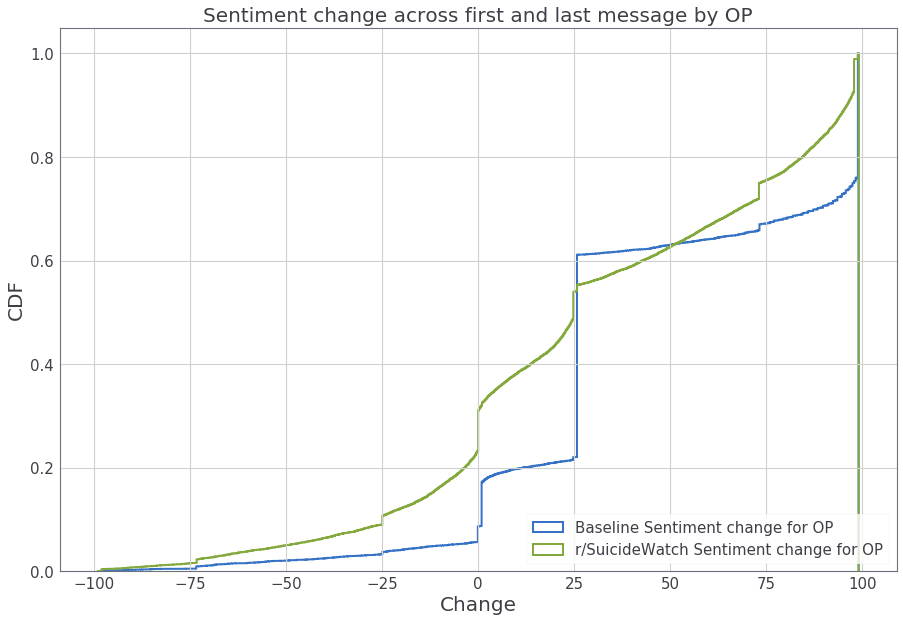

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n1 , bins1 , patches1 = plt.hist(SW_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Sentiment change across first and last message by OP", fontsize = 20)
plt.xlabel("Change",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Baseline Sentiment change for OP', 'r/SuicideWatch Sentiment change for OP' ], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [91]:
print len(BL_OPSentiDiff), len(SW_OPSentiDiff)

stats , pvalue = findMannWhitney(BL_OPSentiDiff , SW_OPSentiDiff)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_OPSentiDiff , BL_OPSentiDiff)
print stats/normstats, pvalue

7058 9860
18479474.0 3.03694834578e-157
Samples are same size, no need to resample
0.741918657866 3.03694834578e-157


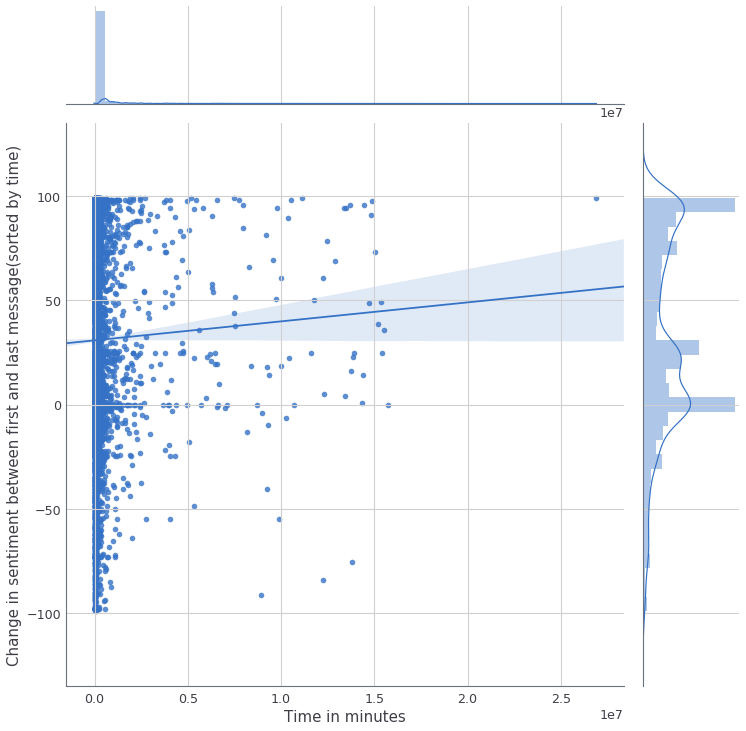

In [92]:
sns.jointplot(x = np.asarray(SW_OPTimeDiff) , y = np.asarray(SW_OPSentiDiff) , kind='reg' ,size = 10);
plt.xlabel("Time in minutes", fontsize = 15)
plt.ylabel("Change in sentiment between first and last message(sorted by time)", fontsize = 15)

In [93]:
SW_timeDist = getTimeDistribution(filteredReply_SW,opAuthors_SW)
BL_timeDist = getTimeDistribution(filteredReply_BL,opAuthors_BL)

Author not found


In [94]:
SW_AllTimeDist = getAllTimeDifferences(filteredReply_SW)
BL_AllTimeDist = getAllTimeDifferences(filteredReply_BL)

 Time not found


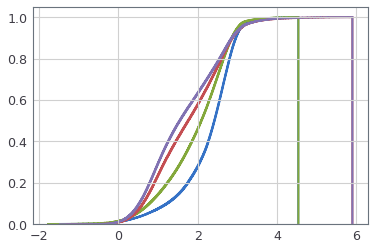

In [95]:
n1 , bins1 , patches1 = plt.hist(np.log10(BL_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(BL_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n3 , bins3 , patches3 = plt.hist(np.log10(SW_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n4 , bins4 , patches4 = plt.hist(np.log10(SW_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


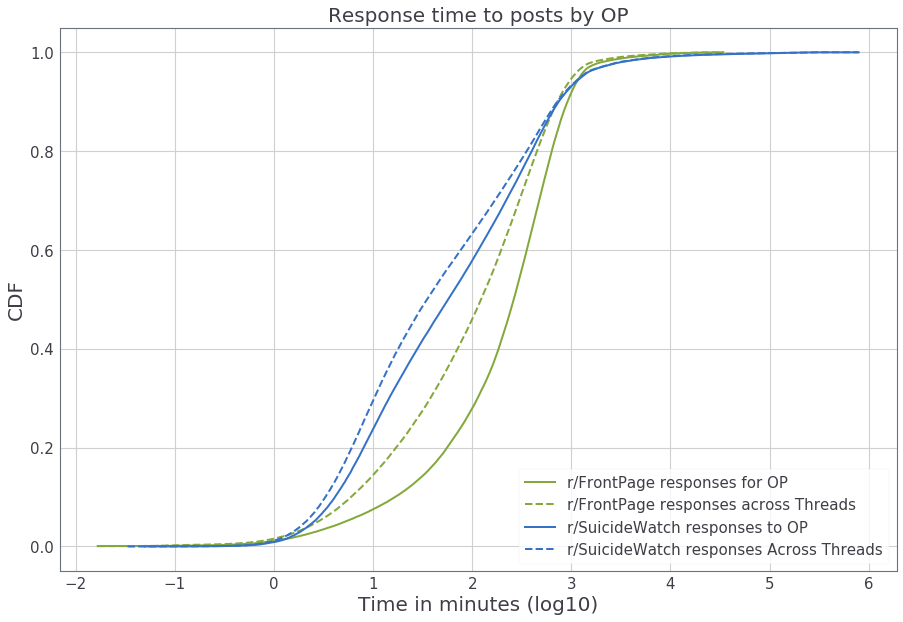

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'g', linewidth=2)
ax.plot(bins2[:-1], n2, 'g--', linewidth=2)
ax.plot(bins3[:-1], n3, 'b', linewidth=2)
ax.plot(bins4[:-1], n4, 'b--', linewidth=2)

plt.title("Response time to posts by OP", fontsize = 20)
plt.xlabel("Time in minutes (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/FrontPage responses for OP', 'r/FrontPage responses across Threads' , 'r/SuicideWatch responses to OP' , 'r/SuicideWatch responses Across Threads'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [97]:
BL_messageParti , BL_userParti , BL_bpusers = getSymmetricBehaviour(filteredUGraphs_BL,opAuthors_BL)


In [98]:
SW_messageParti , SW_userParti , SW_bpusers = getSymmetricBehaviour(filteredUGraphs_SW,opAuthors_SW)

In [99]:
SW_messageParti_all , SW_userParti_all, SW_bpusers_all = getSymmetricBehaviour(filteredUGraphs_SW,opAuthors_SW)

In [100]:
len(SW_bpusers_all)

10527

In [101]:
max(SW_messageParti)

0.6153846153846154

In [102]:
# BPusers['26i7k4']

In [103]:
# nx.draw_networkx(filteredUserGraphs['35flze'])

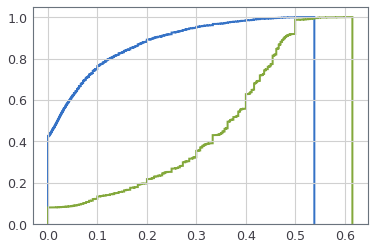

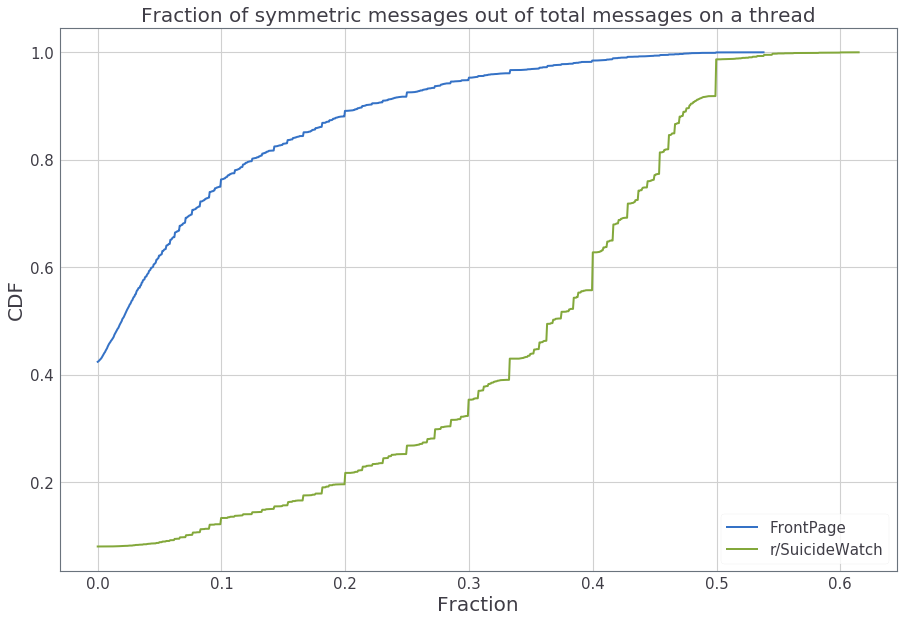

In [104]:
n1 , bins1 , patches1 = plt.hist(BL_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'b', linewidth=2)
ax.plot(bins2[:-1], n2, 'g', linewidth=2)

plt.title("Fraction of symmetric messages out of total messages on a thread", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FrontPage','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [105]:
print np.median(BL_messageParti) , np.mean(BL_messageParti)
print np.median(SW_messageParti) , np.mean(SW_messageParti)

0.019801980198 0.0682055934622
0.368421052632 0.325131177502


In [106]:
print len(BL_messageParti), len(SW_messageParti)

stats , pvalue = findMannWhitney(BL_messageParti , SW_messageParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_messageParti , BL_messageParti)
print stats/normstats, pvalue

11070 10527
12363222.5 0.0
Samples are same size, no need to resample
0.201774574054 0.0


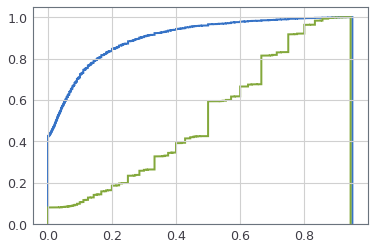

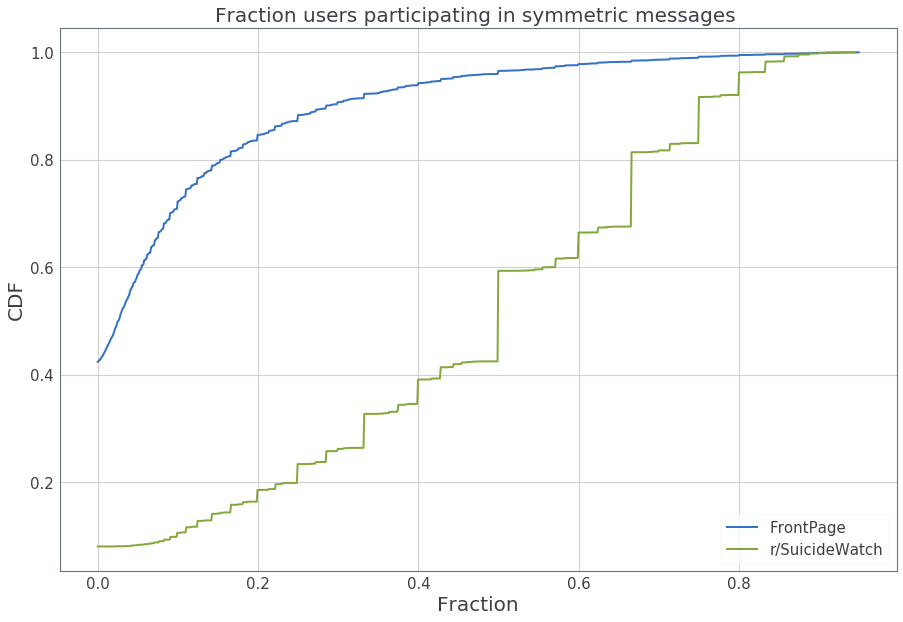

In [107]:
n1 , bins1 , patches1 = plt.hist(BL_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1, 'b', linewidth=2)
ax.plot(bins2[:-1], n2, 'g', linewidth=2)

plt.title("Fraction users participating in symmetric messages ", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FrontPage','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [108]:
print np.median(BL_userParti) , np.mean(BL_userParti)
print np.median(SW_userParti) , np.mean(SW_userParti)

0.0266076696165 0.0944085612761
0.5 0.465851482418


In [109]:
print len(BL_userParti), len(SW_userParti)

stats , pvalue = findMannWhitney(BL_userParti , SW_userParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_userParti , BL_userParti)
print stats/normstats, pvalue

11070 10527
13282703.5 0.0
Samples are same size, no need to resample
0.21678100843 0.0


In [110]:
len(opAuthors_SW) , len(SW_bpusers)

(11437, 10527)

In [111]:
def getDepthEmoDist(graphs , bpUsers , opUsers):
    rootEmoDict = {}
    BPUserEmoDict = {}
    for k in bpUsers:
        if k in opUsers:
            for i , d in graphs[k].nodes(data=True):
                if 'author' in d:
                    if d['author'] == opUsers[k]:
                        depth = d['depth']
                        if depth not in rootEmoDict:
                            rootEmoDict[depth] = []
                        rootEmoDict[depth].append(d['affects'])
                    elif d['author'] in bpUsers[k]:
                        depth = d['depth']
                        if depth not in BPUserEmoDict:
                            BPUserEmoDict[depth] = []
                        BPUserEmoDict[depth].append(d['affects'])
    return rootEmoDict , BPUserEmoDict

def getMeanError(emoDict, depthMax):
    MeanAffects =[]
    Error = []
    for k in range(0,depthMax):
        if k in emoDict:
            MeanAffects.append(np.mean(emoDict[k]))
            Error.append(np.std(emoDict[k])/float(len(emoDict[k])))
        else:
            print len(MeanAffects)
            MeanAffects.append(MeanAffects[-1])
            Error.append(Error[-1])
    return MeanAffects , Error


# def get

In [112]:
SW_rootEmoDict , SW_bpUserEmoDict = getDepthEmoDist(filteredReply_SW,SW_bpusers,opAuthors_SW)


In [113]:
SW_rootMean , SW_rootError = getMeanError(SW_rootEmoDict,50)


In [114]:
SW_BPMean , SW_BPError = getMeanError(SW_bpUserEmoDict,50)
print len(SW_rootMean) , len(SW_rootError) , len(SW_BPError) , len(SW_BPMean)

50 50 50 50


In [115]:
len(SW_bpUserEmoDict[0])

29133

In [116]:
BL_rootEmoDict , BL_bpUserEmoDict = getDepthEmoDist(filteredReply_BL,BL_bpusers,opAuthors_BL)
BL_rootMean , BL_rootError = getMeanError(BL_rootEmoDict,50)
BL_BPMean , BL_BPError = getMeanError(BL_bpUserEmoDict,50)
print len(BL_rootMean) , len(BL_rootError) , len(BL_BPMean) , len(BL_BPError)

24
26
28
30
31
32
33
34
36
37
38
39
40
41
42
43
44
45
46
47
48
49
44
46
48
50 50 50 50


In [117]:
# sns.distplot(rootEmoDict[7])

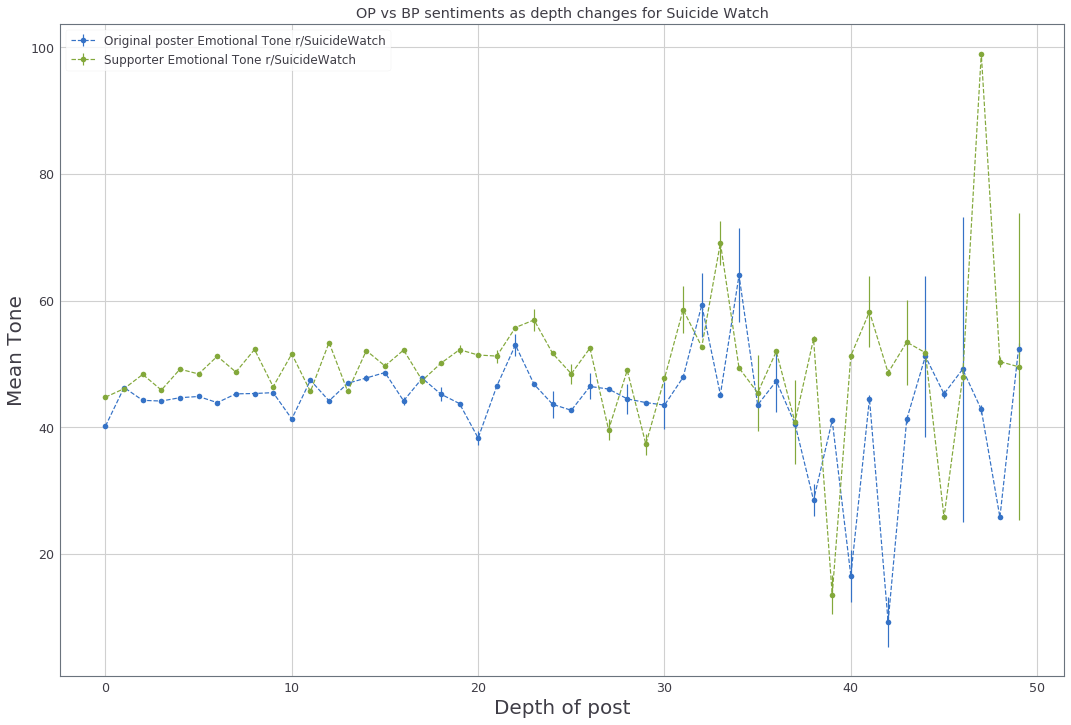

In [118]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(0, 50, 1),SW_rootMean , yerr=SW_rootError, fmt='--o')
ax.errorbar(np.arange(0, 50, 1),SW_BPMean , yerr=SW_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Suicide Watch")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Tone" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/SuicideWatch','Supporter Emotional Tone r/SuicideWatch'],fontsize=12)

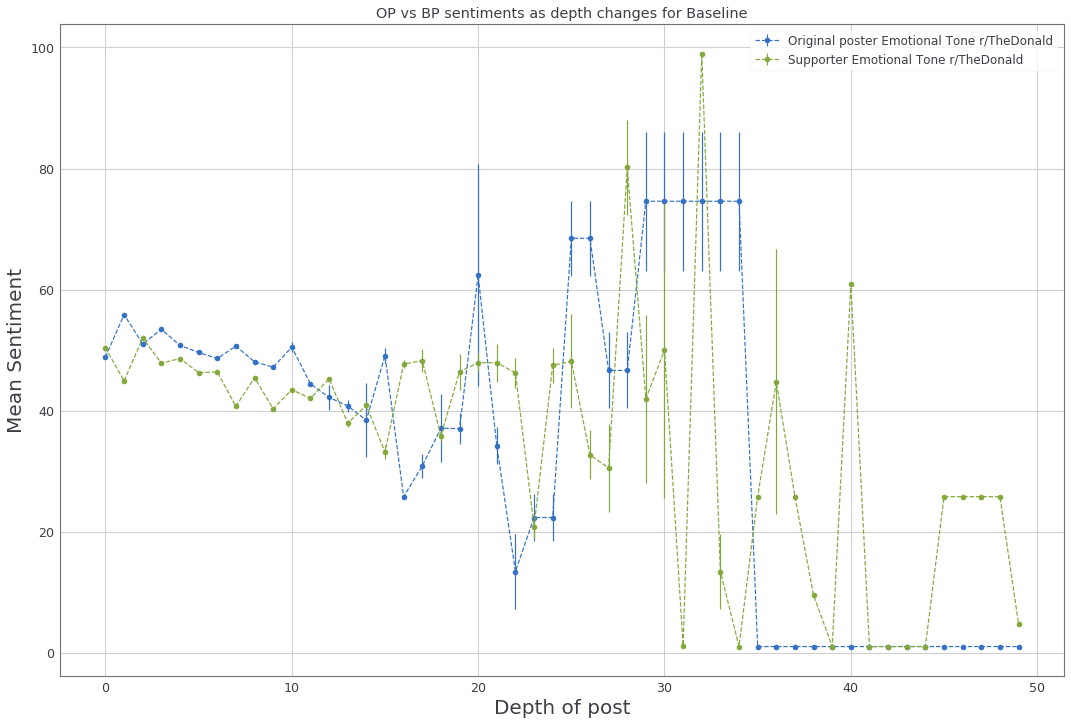

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(0, 50, 1),BL_rootMean , yerr=BL_rootError, fmt='--o')
ax.errorbar(np.arange(0, 50, 1),BL_BPMean , yerr=BL_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Baseline")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Sentiment" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/TheDonald' , 'Supporter Emotional Tone r/TheDonald'], fontsize=12)

In [120]:
triangleDist_SW = [sum(list(nx.triangles(filteredUGraphs_SW[k].to_undirected()).values()))/3 for k in filteredUGraphs_SW]
triangleDist_BL = [sum(list(nx.triangles(filteredUGraphs_BL[k].to_undirected()).values()))/3 for k in filteredUGraphs_BL]

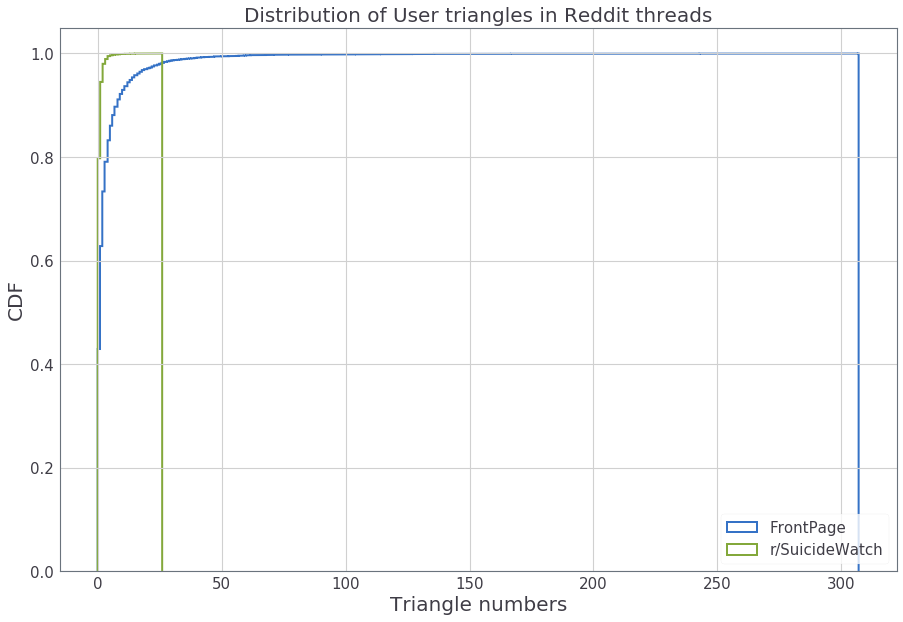

In [121]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(triangleDist_BL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(triangleDist_SW, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FrontPage','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [122]:
print len(triangleDist_BL), len(triangleDist_SW)

stats , pvalue = findMannWhitney(triangleDist_BL , triangleDist_SW)
print stats , pvalue
normstats , normpvalue = findMannWhitney(triangleDist_BL , triangleDist_BL)
print stats/normstats, pvalue

11070 10527
32023975.5 0.0
Samples are same size, no need to resample
0.522648849524 0.0


In [123]:
isinstance(LIWC_SW.iloc[0]['B'],unicode)

False

In [124]:
# SW_Posts = []
# for index, row in LIWC_SW.iterrows():
#     SW_Posts.append(str(row['B']).decode("utf-8", "ignore"))
    


In [125]:
# len(SW_Posts)

In [126]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from gensim.models.ldamulticore import *
import gensim
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer
import spacy
from spacy.lang.en import English
from __future__ import unicode_literals

In [127]:
class Tokenizer:
    def __init__(self):
#         print "Created Tokenizer"
        self.regExTknizr = RegexpTokenizer(r'\w+')
        self.tweetTknizr = TweetTokenizer()
        self.treebankTknizer = TreebankWordTokenizer()
        nlp = English()
#         self.spacytokenizer = English().Defaults.create_tokenizer(nlp)
        self.spacytokenizer = nlp.tokenizer
        
    def tokenizeByRegEx(self , text):
        return self.regExTknizr.tokenize(text)
    
    def tokenizeTweets(self,text):
        return self.tweetTknizr.tokenize(text)
    
    def simpleTokenizer(self, text):
        return text.strip().split()

    def gensimTokenizer(self , text):
        return gensim.utils.simple_tokenize(text)
    
    def wordTokenizer(self, text):
        return word_tokenize(text.strip())
    
    def treebankTokenize(self, text):
        return self.treebankTknizer.tokenize(text.strip())
    
    def spacyTokenize(self,text):
        return self.spacytokenizer(text.strip())

    
    
# create English stop words list
en_stop = get_stop_words('en')
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

def check(u1 , ulist):
    if u1 in ulist:
        return True
    else:
        return False

def getOPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if g.node[node]['author'] == users[k]:
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getBPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in users:
                    continue
                if check(g.node[node]['author'],users[k]):
                    if g.node[node]['author'] in users[k]:
                        if g.node[node]['text'] == '[deleted]':
                            continue
                        texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getIRTexts(replyGraphs , op , bp):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in op or k not in bp:
                    continue
                checkList = [op[k]] + bp[k]
                if not check(g.node[node]['author'],checkList):
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getAllText(replyGraphs):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'text' not in g.node[node]:
                print g.node[node]
                continue
            if g.node[node]['text'] == '[deleted]':
                continue
            texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def tokenizeTexts(testList):
    # list for tokenized documents in loop
    toc_texts = []
    # loop through document list
    tokenizer = Tokenizer()
    for i in testList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.spacyTokenize(raw)
#         print tokens
        # remove stop words from tokens
        stopped_tokens = [i.orth_ for i in tokens if not i.orth_ in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        toc_texts.append(stemmed_tokens)
    return toc_texts

def tokenizeTextsSpacy(textList):
    toc_texts = []
    tokenizer = Tokenizer()
    for i in textList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.spacyTokenize(raw)
        cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
        toc_texts.append(cleaned_tokens)
    return toc_texts

def getTextTopicsSpacy(text,model):
    tokenizer = Tokenizer()
    raw = text.lower()
    tokens = tokenizer.spacyTokenize(raw)
    cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
    topics = model.get_document_topics(dictionary.doc2bow(cleaned_tokens))
    return topics
        
def getTextTopics(text,model):
    raw = text.lower()
    tokenizer = Tokenizer()
    tokens = tokenizer.tokenizeByRegEx(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
#     print stemmed_tokens
    topics = model.get_document_topics(dictionary.doc2bow(stemmed_tokens))
    return topics

In [128]:
# len(opAuthors_SW), len(allGraphs_SW)

In [129]:
# SW_bpusers_all

In [130]:
print len(SW_bpusers_all)
# with open("BpUserDict.pkl",'wb') as f:
#     pkl.dump(SW_bpusers_all,f)

10527


In [131]:
Multiple_BP = {}
allUsers = []
for k in SW_bpusers_all:
    for u in SW_bpusers_all[k]:
        if u in allUsers:
            if u not in Multiple_BP:
                Multiple_BP[u] = 2
            else:
                Multiple_BP[u]+=1
        else:
            allUsers.append(u)
    
    

In [132]:
del Multiple_BP['[deleted]']

In [133]:
len(Multiple_BP)

2879

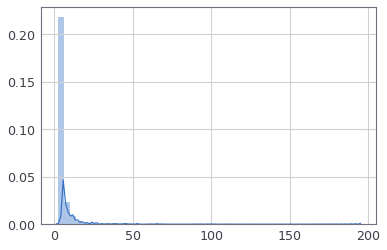

In [134]:
sns.distplot(Multiple_BP.values())

In [135]:
SW_multbpUsers = {}
for k in SW_bpusers_all:
    SW_multbpUsers[k] = []
    for m in SW_bpusers_all[k]:
        if m in Multiple_BP.keys():
            SW_multbpUsers[k].append(m)

In [136]:
# with open("multipleBP.pkl",'wb') as f:
#     pkl.dump(SW_multbpUsers,f)

In [137]:
len(SW_bpusers)

10527

In [138]:
SW_IR_posts = getIRTexts(filteredReply_SW,opAuthors_SW,SW_bpusers)

In [139]:
SW_Texts = getAllText(filteredReply_SW)

{}


In [140]:
BL_Texts = getAllText(filteredReply_BL)

In [141]:
len(filteredReply_BL),len(filteredReply_SW)

(11070, 10527)

In [142]:
len(SW_Texts),len(BL_Texts)

(206009, 859455)

In [143]:
SW_IR_posts[:4]

[u"Hey man....im glad you sound like you've found peace....but I'm sad that it had to be because of this and on these terms. there's always something to live for....you just have to really search sometimes. Im here if you'd like to chat. Hang in there man. :/ ",
 u'Sometimes you have to live first.....the death part comes later.http://www.youtube.com/watch?v=7_5A8Q_Tzc4',
 u'Yes but not 100\u2105 guaranteed to work',
 u"Damn bro, you definitely hit a few chords with me there.  I know that feeling of being down again and feeling like you have to start from scratch.  And I know that financial situation can make things seem hopeless.  What has always helped me was thinking of my nephew.  You need to stop telling yourself that your son is better off without you.  He won't.  Having a father that loves him and shows him is far more important than anything else.  As he gets older, he'll appreciate you even more that you survived this and made it through....and you will make it through.Think a

In [144]:
opAuthors_SW['pfn0u']

u'Heroic_Dose'

In [145]:
SW_OP_posts = getOPTexts(filteredReply_SW,opAuthors_SW)


In [146]:
len(SW_OP_posts)

82027

In [147]:
# SW_OP_posts[:10]

In [148]:
SW_BP_posts = getBPTexts(filteredReply_SW, SW_bpusers)

In [149]:
SW_MultBP_posts = getBPTexts(filteredReply_SW,SW_multbpUsers)

In [150]:
len(SW_MultBP_posts)

41191

In [151]:
len(SW_BP_posts)

83116

In [152]:
# SW_BP_posts[:10]

In [153]:
# sampled_SW_IR_Posts = random.sample(SW_IR_posts,len(SW_BP_posts))

In [154]:
len(SW_OP_posts) , len(SW_BP_posts)

(82027, 83116)

In [155]:
# OP_tokenized = tokenizeTexts(SW_OP_posts)
# BP_tokenized = tokenizeTexts(SW_BP_posts)
# IR_tokenized = tokenizeTexts(SW_IR_posts)

In [156]:
All_cleaned = tokenizeTextsSpacy(SW_Texts)

In [157]:
BL_cleaned = tokenizeTextsSpacy(BL_Texts)

In [158]:
# MultBP_tokenized = tokenizeTexts(SW_MultBP_posts)

In [159]:
len(All_cleaned) , len(BL_cleaned)

(206009, 859455)

In [160]:
# len(OP_tokenized) , len(BP_tokenized)

In [161]:
# OP_tokenized[1]

In [162]:
#turn our tokenized documents into a id <-> term dictionary
dictionary = gensim.corpora.Dictionary(All_cleaned)
# dictionary_BP =gensim.corpora.Dictionary(BP_tokenized)
# dictionary_IR =gensim.corpora.Dictionary(IR_tokenized)

In [163]:
dictionary_BL = gensim.corpora.Dictionary(BL_cleaned)

In [164]:
# len(dictionary_BP), len(dictionary_IR)
len(dictionary) , len(dictionary_BL)

(176804, 520089)

In [165]:
# len(dictionary_OP) , len(dictionary_BP)

In [166]:
# convert tokenized documents into a document-term matrix
# corpus_OP = [dictionary.doc2bow(text) for text in OP_cleaned_text]
# corpus_BP = [dictionary.doc2bow(text) for text in BP_tokenized]
# corpus_IR = [dictionary.doc2bow(text) for text in IR_tokenized]

In [167]:
All_SWcorpus = [dictionary.doc2bow(text) for text in All_cleaned]

In [168]:
All_BLcorpus = [dictionary_BL.doc2bow(text) for text in BL_cleaned]

In [169]:
# MultBP_corpus = [dictionary.doc2bow(text) for text in MultBP_tokenized]

# BP_tokenized[3]

# len(corpus_BP) , len(corpus_IR)

# len(corpus_BP)

# type(corpus_OP)

In [170]:
len(All_SWcorpus) , len(All_BLcorpus)

(206009, 859455)

In [171]:
sampled_corpus_SW = random.sample(All_SWcorpus,10000)
sampled_corpus_BL = random.sample(All_BLcorpus,10000)

In [172]:
ldamodel = LdaMulticore(All_SWcorpus, id2word=dictionary, num_topics=80,workers=5) 
# ldamodel = gensim.models.ldamodel.LdaModel(sampled_corpus_SW, id2word=dictionary, num_topics=40) 

In [173]:
ldamodel_BL = LdaMulticore(All_BLcorpus, id2word=dictionary_BL, num_topics=50,workers=5) 
# ldamodel_BL = gensim.models.ldamodel.LdaModel(sampled_corpus_BL, id2word=dictionary_BL, num_topics=100) 

In [174]:
# generate LDA model
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, num_topics=100, id2word = dictionary_OP, passes=20)
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, id2word=dictionary, num_topics=50) 

# ldamodel_IR = gensim.models.ldamodel.LdaModel(corpus_IR, id2word=dictionary, num_topics=20) 



# ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, num_topics=100, id2word = dictionary_BP, passes=20)
# ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, id2word=dictionary, num_topics=10) 

# ldamodel[All_corpus[11]]

# ldamodel_MultBP = gensim.models.ldamodel.LdaModel(MultBP_corpus, id2word=dictionary, num_topics=10) 

In [175]:
# ldamodel = gensim.models.ldamodel.LdaModel.load("SW_allcorpus_model_v3_new")
# ldamodel_BL = gensim.models.ldamodel.LdaModel.load("BL_allcorpus_model_v3_new")

In [176]:
pyLDAvis.enable_notebook()
topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel,corpus=sampled_corpus_SW,dictionary=dictionary)
# pyLDAvis.display(topic_display)

In [177]:
pyLDAvis.display(topic_display)

In [178]:
pyLDAvis.enable_notebook()
topic_display_BL = pyLDAvis.gensim.prepare(topic_model=ldamodel_BL,corpus=sampled_corpus_BL,dictionary=dictionary_BL)

In [179]:
pyLDAvis.display(topic_display_BL)

In [180]:
# ldamodel.save("TopicModels/SW_allcorpus_model_v5")

In [181]:
# ldamodel_BL.save("TopicModels/BL_allcorpus_model_v5")

In [182]:


# turn on automatic rendering of visualizations
# pyLDAvis.enable_notebook()
# bp_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_BP,corpus=corpus_BP,dictionary=dictionary)
# pyLDAvis.display(bp_topic_display)

In [183]:
# turn on automatic rendering of visualizations
# pyLDAvis.enable_notebook()

# ir_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_IR,corpus=corpus_IR,dictionary=dictionary)
# pyLDAvis.display(ir_topic_display)

In [184]:
# ldamodel_BP.print_topics(10)

# ldamodel_OP.print_topics(10)



In [185]:
# ldamodel_IR.print_topics(10)

In [186]:
dictionary.values().index('harm')

161347

In [187]:
# ldamodel.save("SW_Alltext.mdl")

In [188]:
topics1 = getTextTopicsSpacy("hello there this is the captain speaking, we are about to crash land. Brace for impact",ldamodel)
topics2 = getTextTopicsSpacy("The quick brown fox jumped over the lazy fence",ldamodel)
topics3 = getTextTopicsSpacy("Hello everyone, we are not going to crash land. This is the captain", ldamodel)

In [189]:
print topics1, topics2 , topics3

[(51, 0.13967432), (58, 0.35991842), (69, 0.3800948)] [(32, 0.35599977), (41, 0.34908667), (51, 0.15741357)] [(50, 0.23021545), (58, 0.20144314), (69, 0.40792474)]


In [190]:
a = np.zeros(40)
a[10] = 100
print a

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.]


In [191]:
from scipy import spatial
def findJaccardTopicsMetric(topicarray1, topicarray2):
    topicidx1 = [k[0] for k in topicarray1]
    topicidx2 = [k[0] for k in topicarray2]
    intersection = len(list(set(topicidx1).intersection(topicidx2)))
    union = (len(topicidx1) + len(topicidx2)) - intersection
    if union == 0.0:
        return 0.0
    return float(intersection) / float(union)

def findEuclideanTopicsMetric(topicarray1, topicarray2,topicDimension=40):
    topicidx1 = np.zeros(topicDimension)
    topicidx2 = np.zeros(topicDimension)
    for k in topicarray1:
        topicidx1[k[0]] = k[1]
    for k in topicarray2:
        topicidx2[k[0]] = k[1]
    return 1.0001-spatial.distance.euclidean(topicidx1,topicidx2)

def findCosineTopicsMetric(topicarray1, topicarray2,topicDimension=40):
    topicidx1 = np.zeros(topicDimension)
    topicidx2 = np.zeros(topicDimension)
    for k in topicarray1:
        topicidx1[k[0]] = k[1]
    for k in topicarray2:
        topicidx2[k[0]] = k[1]
    return 1.0001 - spatial.distance.cosine(topicidx1,topicidx2)

In [192]:
print findEuclideanTopicsMetric(topics1 , topics2,topicDimension=80) , findEuclideanTopicsMetric(topics2,topics3,topicDimension=80) , findEuclideanTopicsMetric(topics1,topics3, topicDimension=80),

0.276964230988 0.269786742002 0.686417059373


In [193]:
print findCosineTopicsMetric(topics1 , topics2,topicDimension=80) , findCosineTopicsMetric(topics2,topics3,topicDimension=80) , findCosineTopicsMetric(topics1,topics3, topicDimension=80),

0.0777171605545 0.0001 0.823842558366


In [194]:
import time 

def createTopicalUserGraph(srcDestWeightList):
    userGraph = nx.DiGraph()
    for k in srcDestWeightList:
        src = k[0]
        dst = k[1]
        jaccard = k[2]
        
        if not userGraph.has_node(src):
            userGraph.add_node(src)
        if not userGraph.has_node(dst):
            userGraph.add_node(dst)  
        if not userGraph.has_edge(src,dst):
            userGraph.add_edge(src, dst , weight=jaccard )
        else:
            origWeight = userGraph[src][dst]['weight']
            update = float((origWeight + jaccard))/2.0
            userGraph[src][dst]['weight'] = update
    return userGraph
        
    
def createTopicGraphs(replyGraphs,ldaModel, topicDimensions, deletedUsers=None,logfile=None):
    topicGraphs = {}
    index = 0
    total = len(replyGraphs)
    for i in replyGraphs:
        index+=1
        start_t = time.time()
        deleted = nx.get_node_attributes(replyGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(replyGraphs[i],'author')
        texts = nx.get_node_attributes(replyGraphs[i],'text')
        srcDestWeightList = []
        for e in replyGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            
            if e[0] in texts and e[1] in texts:
                topicSrc = getTextTopicsSpacy(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
                topicDest = getTextTopicsSpacy(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
                jaccard = findEuclideanTopicsMetric(topicSrc, topicDest,topicDimension=topicDimensions)
            else:
                jaccard = 0.00001
            replyGraphs[i][e[0]][e[1]]['weight'] = jaccard
            srcDestWeightList.append((src,dst,jaccard))
        topicGraphs[i] = createTopicalUserGraph(srcDestWeightList)#userGraph
        end_t = time.time()
        print "executed graph in %f seconds"%(end_t-start_t)
        logging.debug("createTopicGraphs::executed %d th graph in %f seconds, total graph %d",index,float(end_t-start_t),total) 
    return topicGraphs
    

In [195]:
def sampleGraphs(graphDict , samples):
    sampledKeys = random.sample(graphDict.keys(), samples)
    sampledGraphDict = {}
    for k in sampledKeys:
        sampledGraphDict[k] = graphDict[k]
    return sampledGraphDict

In [196]:
sampled_Filtered_SW = sampleGraphs(filteredReply_SW,1000)

In [197]:
topicUserGraphs = createTopicGraphs(filteredReply_SW,ldamodel,topicDimensions=80)

executed graph in 1.748132 seconds
executed graph in 1.135132 seconds
executed graph in 2.435377 seconds
executed graph in 0.980645 seconds
executed graph in 0.920100 seconds
executed graph in 1.055969 seconds
executed graph in 1.269082 seconds
executed graph in 1.726046 seconds
executed graph in 1.068642 seconds
executed graph in 1.301541 seconds
executed graph in 0.941850 seconds
executed graph in 0.921545 seconds
executed graph in 1.375764 seconds
executed graph in 6.026521 seconds
executed graph in 2.829804 seconds
executed graph in 1.524418 seconds
executed graph in 1.056998 seconds
executed graph in 1.415627 seconds
executed graph in 1.034795 seconds
executed graph in 1.501340 seconds
executed graph in 1.070473 seconds
executed graph in 1.339841 seconds
executed graph in 1.086912 seconds
executed graph in 1.606634 seconds
executed graph in 2.126437 seconds
executed graph in 3.174082 seconds
executed graph in 2.117379 seconds
executed graph in 0.891202 seconds
executed graph in 3.

executed graph in 1.736770 seconds
executed graph in 2.204423 seconds
executed graph in 0.989703 seconds
executed graph in 1.064283 seconds
executed graph in 2.110821 seconds
executed graph in 1.957555 seconds
executed graph in 1.286003 seconds
executed graph in 1.794301 seconds
executed graph in 1.274133 seconds
executed graph in 2.091657 seconds
executed graph in 1.311182 seconds
executed graph in 1.731950 seconds
executed graph in 1.730430 seconds
executed graph in 3.538296 seconds
executed graph in 0.954741 seconds
executed graph in 1.310397 seconds
executed graph in 1.568930 seconds
executed graph in 1.053329 seconds
executed graph in 4.275912 seconds
executed graph in 1.073654 seconds
executed graph in 1.676712 seconds
executed graph in 0.851808 seconds
executed graph in 1.198222 seconds
executed graph in 0.988022 seconds
executed graph in 1.214809 seconds
executed graph in 1.072256 seconds
executed graph in 1.179976 seconds
executed graph in 3.172926 seconds
executed graph in 1.

executed graph in 3.423979 seconds
executed graph in 1.475577 seconds
executed graph in 1.278408 seconds
executed graph in 1.025867 seconds
executed graph in 1.079830 seconds
executed graph in 1.843122 seconds
executed graph in 1.235237 seconds
executed graph in 1.421765 seconds
executed graph in 1.255848 seconds
executed graph in 1.349606 seconds
executed graph in 0.879484 seconds
executed graph in 1.666118 seconds
executed graph in 1.374872 seconds
executed graph in 1.367735 seconds
executed graph in 1.183159 seconds
executed graph in 1.423098 seconds
executed graph in 2.148625 seconds
executed graph in 2.236844 seconds
executed graph in 1.846042 seconds
executed graph in 1.228635 seconds
executed graph in 0.948429 seconds
executed graph in 0.978894 seconds
executed graph in 1.229985 seconds
executed graph in 1.350373 seconds
executed graph in 2.144152 seconds
executed graph in 2.042639 seconds
executed graph in 2.557765 seconds
executed graph in 1.008339 seconds
executed graph in 1.

executed graph in 0.955961 seconds
executed graph in 1.280041 seconds
executed graph in 0.946418 seconds
executed graph in 1.795662 seconds
executed graph in 3.461631 seconds
executed graph in 2.980982 seconds
executed graph in 4.078517 seconds
executed graph in 1.568433 seconds
executed graph in 4.839658 seconds
executed graph in 0.997307 seconds
executed graph in 1.539338 seconds
executed graph in 0.933866 seconds
executed graph in 2.254254 seconds
executed graph in 1.459210 seconds
executed graph in 1.842789 seconds
executed graph in 1.030614 seconds
executed graph in 1.629852 seconds
executed graph in 2.958411 seconds
executed graph in 1.687534 seconds
executed graph in 0.926589 seconds
executed graph in 1.216086 seconds
executed graph in 4.121692 seconds
executed graph in 1.340454 seconds
executed graph in 2.174647 seconds
executed graph in 1.643774 seconds
executed graph in 2.022049 seconds
executed graph in 1.209363 seconds
executed graph in 1.509906 seconds
executed graph in 1.

executed graph in 1.271786 seconds
executed graph in 1.590704 seconds
executed graph in 2.161719 seconds
executed graph in 7.541636 seconds
executed graph in 1.423833 seconds
executed graph in 3.515824 seconds
executed graph in 1.101513 seconds
executed graph in 0.995928 seconds
executed graph in 4.424690 seconds
executed graph in 2.341384 seconds
executed graph in 1.495943 seconds
executed graph in 1.545166 seconds
executed graph in 1.678884 seconds
executed graph in 0.896352 seconds
executed graph in 3.449771 seconds
executed graph in 1.347075 seconds
executed graph in 1.261643 seconds
executed graph in 1.804736 seconds
executed graph in 1.767993 seconds
executed graph in 1.627466 seconds
executed graph in 1.400168 seconds
executed graph in 2.305078 seconds
executed graph in 1.977927 seconds
executed graph in 0.951186 seconds
executed graph in 3.047996 seconds
executed graph in 1.257868 seconds
executed graph in 2.342305 seconds
executed graph in 1.336553 seconds
executed graph in 2.

executed graph in 0.873032 seconds
executed graph in 0.969486 seconds
executed graph in 1.443646 seconds
executed graph in 2.831336 seconds
executed graph in 1.009919 seconds
executed graph in 2.402549 seconds
executed graph in 1.273031 seconds
executed graph in 3.281899 seconds
executed graph in 1.176619 seconds
executed graph in 1.316275 seconds
executed graph in 0.995454 seconds
executed graph in 1.660201 seconds
executed graph in 0.920825 seconds
executed graph in 1.389279 seconds
executed graph in 2.224020 seconds
executed graph in 1.217045 seconds
executed graph in 3.179398 seconds
executed graph in 1.824044 seconds
executed graph in 1.977370 seconds
executed graph in 1.165617 seconds
executed graph in 1.607975 seconds
executed graph in 1.342585 seconds
executed graph in 1.423789 seconds
executed graph in 4.306596 seconds
executed graph in 0.877189 seconds
executed graph in 1.178039 seconds
executed graph in 2.354131 seconds
executed graph in 1.116938 seconds
executed graph in 1.

executed graph in 1.438331 seconds
executed graph in 1.084713 seconds
executed graph in 1.640416 seconds
executed graph in 1.036745 seconds
executed graph in 1.575067 seconds
executed graph in 3.851777 seconds
executed graph in 3.378462 seconds
executed graph in 1.148041 seconds
executed graph in 1.403016 seconds
executed graph in 1.284217 seconds
executed graph in 1.297809 seconds
executed graph in 1.309027 seconds
executed graph in 1.209013 seconds
executed graph in 1.339657 seconds
executed graph in 1.041582 seconds
executed graph in 1.074936 seconds
executed graph in 2.059857 seconds
executed graph in 1.177319 seconds
executed graph in 1.590985 seconds
executed graph in 2.248345 seconds
executed graph in 2.072373 seconds
executed graph in 1.271670 seconds
executed graph in 1.313747 seconds
executed graph in 1.631975 seconds
executed graph in 1.489596 seconds
executed graph in 1.356074 seconds
executed graph in 2.343220 seconds
executed graph in 1.259486 seconds
executed graph in 1.

executed graph in 1.923389 seconds
executed graph in 1.571653 seconds
executed graph in 2.636309 seconds
executed graph in 5.727154 seconds
executed graph in 4.001896 seconds
executed graph in 1.845183 seconds
executed graph in 1.550414 seconds
executed graph in 1.586843 seconds
executed graph in 1.801819 seconds
executed graph in 2.663031 seconds
executed graph in 1.893992 seconds
executed graph in 1.256772 seconds
executed graph in 1.052073 seconds
executed graph in 1.940211 seconds
executed graph in 1.803518 seconds
executed graph in 1.108692 seconds
executed graph in 0.894732 seconds
executed graph in 3.507377 seconds
executed graph in 1.872617 seconds
executed graph in 2.722778 seconds
executed graph in 1.144426 seconds
executed graph in 4.529704 seconds
executed graph in 1.350466 seconds
executed graph in 1.023961 seconds
executed graph in 0.870442 seconds
executed graph in 1.828104 seconds
executed graph in 2.571707 seconds
executed graph in 1.034801 seconds
executed graph in 2.

executed graph in 3.817480 seconds
executed graph in 1.282630 seconds
executed graph in 4.056854 seconds
executed graph in 1.084565 seconds
executed graph in 1.155542 seconds
executed graph in 3.074831 seconds
executed graph in 1.046734 seconds
executed graph in 1.079314 seconds
executed graph in 1.200202 seconds
executed graph in 2.167207 seconds
executed graph in 2.613629 seconds
executed graph in 4.180137 seconds
executed graph in 1.294768 seconds
executed graph in 0.881312 seconds
executed graph in 3.825576 seconds
executed graph in 3.679615 seconds
executed graph in 4.960221 seconds
executed graph in 3.819602 seconds
executed graph in 1.282965 seconds
executed graph in 1.322133 seconds
executed graph in 1.694151 seconds
executed graph in 3.650712 seconds
executed graph in 1.406152 seconds
executed graph in 1.404397 seconds
executed graph in 1.513777 seconds
executed graph in 2.053924 seconds
executed graph in 5.215909 seconds
executed graph in 1.215654 seconds
executed graph in 2.

executed graph in 2.208425 seconds
executed graph in 1.438567 seconds
executed graph in 1.978005 seconds
executed graph in 1.271599 seconds
executed graph in 1.126886 seconds
executed graph in 2.148975 seconds
executed graph in 1.313824 seconds
executed graph in 1.272525 seconds
executed graph in 2.433139 seconds
executed graph in 3.114882 seconds
executed graph in 2.120113 seconds
executed graph in 1.494928 seconds
executed graph in 4.629241 seconds
executed graph in 1.113708 seconds
executed graph in 2.214968 seconds
executed graph in 2.266973 seconds
executed graph in 0.954901 seconds
executed graph in 1.844557 seconds
executed graph in 1.967689 seconds
executed graph in 1.251933 seconds
executed graph in 1.531543 seconds
executed graph in 2.452181 seconds
executed graph in 0.860030 seconds
executed graph in 1.315394 seconds
executed graph in 1.233110 seconds
executed graph in 1.686607 seconds
executed graph in 0.937521 seconds
executed graph in 2.128154 seconds
executed graph in 1.

executed graph in 3.663025 seconds
executed graph in 1.793923 seconds
executed graph in 1.385497 seconds
executed graph in 1.000605 seconds
executed graph in 1.333603 seconds
executed graph in 3.112175 seconds
executed graph in 1.496053 seconds
executed graph in 5.650948 seconds
executed graph in 2.662944 seconds
executed graph in 3.024889 seconds
executed graph in 2.268199 seconds
executed graph in 2.658676 seconds
executed graph in 3.620917 seconds
executed graph in 0.898039 seconds
executed graph in 2.304324 seconds
executed graph in 1.164727 seconds
executed graph in 1.898536 seconds
executed graph in 1.315033 seconds
executed graph in 5.640307 seconds
executed graph in 1.888593 seconds
executed graph in 1.406491 seconds
executed graph in 1.398257 seconds
executed graph in 2.124832 seconds
executed graph in 1.064504 seconds
executed graph in 0.946330 seconds
executed graph in 2.389789 seconds
executed graph in 1.401178 seconds
executed graph in 3.084444 seconds
executed graph in 0.

executed graph in 1.333892 seconds
executed graph in 2.001975 seconds
executed graph in 1.159679 seconds
executed graph in 1.827181 seconds
executed graph in 3.793217 seconds
executed graph in 0.878371 seconds
executed graph in 1.990725 seconds
executed graph in 1.109631 seconds
executed graph in 0.956896 seconds
executed graph in 1.621763 seconds
executed graph in 5.712346 seconds
executed graph in 11.341856 seconds
executed graph in 2.321031 seconds
executed graph in 3.133630 seconds
executed graph in 1.304343 seconds
executed graph in 1.532111 seconds
executed graph in 5.084762 seconds
executed graph in 1.035323 seconds
executed graph in 1.832618 seconds
executed graph in 1.873363 seconds
executed graph in 1.959371 seconds
executed graph in 2.159450 seconds
executed graph in 1.767586 seconds
executed graph in 1.635009 seconds
executed graph in 1.285626 seconds
executed graph in 1.289899 seconds
executed graph in 3.603766 seconds
executed graph in 2.205637 seconds
executed graph in 1

executed graph in 2.280183 seconds
executed graph in 1.820241 seconds
executed graph in 1.763298 seconds
executed graph in 2.373203 seconds
executed graph in 1.392296 seconds
executed graph in 1.503801 seconds
executed graph in 1.436941 seconds
executed graph in 1.448329 seconds
executed graph in 6.376019 seconds
executed graph in 1.000376 seconds
executed graph in 1.346033 seconds
executed graph in 2.041994 seconds
executed graph in 1.243680 seconds
executed graph in 2.511288 seconds
executed graph in 1.200009 seconds
executed graph in 1.038814 seconds
executed graph in 1.656697 seconds
executed graph in 1.350422 seconds
executed graph in 0.927304 seconds
executed graph in 2.087883 seconds
executed graph in 2.696812 seconds
executed graph in 1.031666 seconds
executed graph in 1.517250 seconds
executed graph in 1.511614 seconds
executed graph in 4.552033 seconds
executed graph in 2.602355 seconds
executed graph in 2.131037 seconds
executed graph in 1.244078 seconds
executed graph in 2.

executed graph in 2.420527 seconds
executed graph in 1.593301 seconds
executed graph in 0.848725 seconds
executed graph in 1.013077 seconds
executed graph in 1.541886 seconds
executed graph in 2.218553 seconds
executed graph in 2.558426 seconds
executed graph in 1.110542 seconds
executed graph in 0.913531 seconds
executed graph in 4.611484 seconds
executed graph in 1.307120 seconds
executed graph in 0.879855 seconds
executed graph in 1.077168 seconds
executed graph in 2.297572 seconds
executed graph in 0.973936 seconds
executed graph in 1.053885 seconds
executed graph in 2.752588 seconds
executed graph in 1.047047 seconds
executed graph in 2.471334 seconds
executed graph in 1.113806 seconds
executed graph in 1.844094 seconds
executed graph in 2.441622 seconds
executed graph in 1.022962 seconds
executed graph in 5.380776 seconds
executed graph in 2.150696 seconds
executed graph in 2.025050 seconds
executed graph in 3.638997 seconds
executed graph in 4.735175 seconds
executed graph in 1.

executed graph in 1.197300 seconds
executed graph in 1.963049 seconds
executed graph in 0.972155 seconds
executed graph in 1.816549 seconds
executed graph in 3.241197 seconds
executed graph in 2.229879 seconds
executed graph in 1.083270 seconds
executed graph in 1.385886 seconds
executed graph in 1.391087 seconds
executed graph in 1.482136 seconds
executed graph in 1.123474 seconds
executed graph in 2.062451 seconds
executed graph in 1.954048 seconds
executed graph in 1.427248 seconds
executed graph in 1.395078 seconds
executed graph in 1.185731 seconds
executed graph in 4.300338 seconds
executed graph in 1.578467 seconds
executed graph in 1.436052 seconds
executed graph in 1.055409 seconds
executed graph in 1.021643 seconds
executed graph in 1.847818 seconds
executed graph in 1.390050 seconds
executed graph in 1.789455 seconds
executed graph in 9.552691 seconds
executed graph in 2.741157 seconds
executed graph in 1.714000 seconds
executed graph in 1.293453 seconds
executed graph in 1.

executed graph in 1.466769 seconds
executed graph in 3.078923 seconds
executed graph in 1.029555 seconds
executed graph in 1.782653 seconds
executed graph in 0.974405 seconds
executed graph in 1.115260 seconds
executed graph in 3.685161 seconds
executed graph in 1.147450 seconds
executed graph in 2.440609 seconds
executed graph in 1.019520 seconds
executed graph in 1.347785 seconds
executed graph in 1.890271 seconds
executed graph in 1.314044 seconds
executed graph in 0.961762 seconds
executed graph in 1.277380 seconds
executed graph in 1.679870 seconds
executed graph in 1.522110 seconds
executed graph in 1.773747 seconds
executed graph in 1.083506 seconds
executed graph in 1.217559 seconds
executed graph in 1.257373 seconds
executed graph in 2.526760 seconds
executed graph in 2.040972 seconds
executed graph in 1.164304 seconds
executed graph in 1.643933 seconds
executed graph in 1.533410 seconds
executed graph in 3.265312 seconds
executed graph in 1.798191 seconds
executed graph in 1.

executed graph in 0.955737 seconds
executed graph in 1.197679 seconds
executed graph in 1.327599 seconds
executed graph in 1.250309 seconds
executed graph in 1.087709 seconds
executed graph in 1.700680 seconds
executed graph in 1.557791 seconds
executed graph in 3.589327 seconds
executed graph in 4.278226 seconds
executed graph in 1.406430 seconds
executed graph in 3.895992 seconds
executed graph in 2.175949 seconds
executed graph in 1.665725 seconds
executed graph in 1.536509 seconds
executed graph in 2.202035 seconds
executed graph in 2.960327 seconds
executed graph in 0.897930 seconds
executed graph in 1.851684 seconds
executed graph in 1.571981 seconds
executed graph in 1.487734 seconds
executed graph in 1.556845 seconds
executed graph in 1.326500 seconds
executed graph in 1.015087 seconds
executed graph in 1.083929 seconds
executed graph in 2.170637 seconds
executed graph in 1.553529 seconds
executed graph in 1.923335 seconds
executed graph in 2.493603 seconds
executed graph in 0.

executed graph in 1.416773 seconds
executed graph in 1.145629 seconds
executed graph in 0.958595 seconds
executed graph in 2.150217 seconds
executed graph in 1.777363 seconds
executed graph in 2.625785 seconds
executed graph in 1.261196 seconds
executed graph in 2.504876 seconds
executed graph in 0.991610 seconds
executed graph in 0.935415 seconds
executed graph in 1.349264 seconds
executed graph in 3.134197 seconds
executed graph in 6.119539 seconds
executed graph in 1.581169 seconds
executed graph in 1.237723 seconds
executed graph in 0.907560 seconds
executed graph in 2.131042 seconds
executed graph in 1.063878 seconds
executed graph in 1.921591 seconds
executed graph in 1.327376 seconds
executed graph in 1.020159 seconds
executed graph in 1.028332 seconds
executed graph in 1.004384 seconds
executed graph in 1.501872 seconds
executed graph in 1.715890 seconds
executed graph in 2.430755 seconds
executed graph in 1.603654 seconds
executed graph in 4.703586 seconds
executed graph in 1.

executed graph in 1.198266 seconds
executed graph in 7.573168 seconds
executed graph in 1.280363 seconds
executed graph in 1.006624 seconds
executed graph in 1.323824 seconds
executed graph in 1.543866 seconds
executed graph in 1.837938 seconds
executed graph in 1.560435 seconds
executed graph in 1.311488 seconds
executed graph in 1.245801 seconds
executed graph in 2.629965 seconds
executed graph in 1.149909 seconds
executed graph in 1.516259 seconds
executed graph in 1.278163 seconds
executed graph in 1.447060 seconds
executed graph in 1.824620 seconds
executed graph in 1.465638 seconds
executed graph in 1.039607 seconds
executed graph in 4.049218 seconds
executed graph in 1.107426 seconds
executed graph in 2.086353 seconds
executed graph in 1.520416 seconds
executed graph in 1.876113 seconds
executed graph in 1.669857 seconds
executed graph in 1.420573 seconds
executed graph in 1.240557 seconds
executed graph in 1.092685 seconds
executed graph in 1.127207 seconds
executed graph in 0.

executed graph in 5.613240 seconds
executed graph in 3.277073 seconds
executed graph in 1.277915 seconds
executed graph in 1.177998 seconds
executed graph in 1.770874 seconds
executed graph in 1.035903 seconds
executed graph in 1.086591 seconds
executed graph in 1.579220 seconds
executed graph in 1.216046 seconds
executed graph in 1.173635 seconds
executed graph in 0.848992 seconds
executed graph in 1.381778 seconds
executed graph in 1.332408 seconds
executed graph in 1.925054 seconds
executed graph in 1.043792 seconds
executed graph in 1.063967 seconds
executed graph in 5.039152 seconds
executed graph in 0.897721 seconds
executed graph in 1.761058 seconds
executed graph in 4.334942 seconds
executed graph in 3.385244 seconds
executed graph in 1.413732 seconds
executed graph in 5.069178 seconds
executed graph in 1.655906 seconds
executed graph in 1.557861 seconds
executed graph in 1.545792 seconds
executed graph in 1.366649 seconds
executed graph in 6.133413 seconds
executed graph in 0.

executed graph in 1.017047 seconds
executed graph in 1.558163 seconds
executed graph in 2.059612 seconds
executed graph in 0.982657 seconds
executed graph in 3.219182 seconds
executed graph in 1.885130 seconds
executed graph in 1.584619 seconds
executed graph in 2.007583 seconds
executed graph in 4.823513 seconds
executed graph in 1.543847 seconds
executed graph in 3.386583 seconds
executed graph in 2.959151 seconds
executed graph in 1.388637 seconds
executed graph in 2.974149 seconds
executed graph in 2.790518 seconds
executed graph in 1.215426 seconds
executed graph in 3.193240 seconds
executed graph in 1.007079 seconds
executed graph in 1.328090 seconds
executed graph in 1.177728 seconds
executed graph in 2.713048 seconds
executed graph in 1.395415 seconds
executed graph in 1.389825 seconds
executed graph in 0.954197 seconds
executed graph in 1.167944 seconds
executed graph in 1.864355 seconds
executed graph in 0.991002 seconds
executed graph in 1.826773 seconds
executed graph in 1.

executed graph in 1.367287 seconds
executed graph in 1.678058 seconds
executed graph in 1.224513 seconds
executed graph in 2.066695 seconds
executed graph in 1.292845 seconds
executed graph in 2.508470 seconds
executed graph in 4.324649 seconds
executed graph in 1.970844 seconds
executed graph in 0.992924 seconds
executed graph in 1.518107 seconds
executed graph in 1.681140 seconds
executed graph in 0.977979 seconds
executed graph in 4.173236 seconds
executed graph in 1.323578 seconds
executed graph in 1.063208 seconds
executed graph in 3.208427 seconds
executed graph in 0.888005 seconds
executed graph in 1.037993 seconds
executed graph in 0.976859 seconds
executed graph in 0.889900 seconds
executed graph in 1.175797 seconds
executed graph in 1.117892 seconds
executed graph in 1.663956 seconds
executed graph in 1.206795 seconds
executed graph in 0.892669 seconds
executed graph in 2.177250 seconds
executed graph in 1.589430 seconds
executed graph in 3.170604 seconds
executed graph in 1.

executed graph in 1.372509 seconds
executed graph in 1.413625 seconds
executed graph in 1.909564 seconds
executed graph in 1.061375 seconds
executed graph in 0.880337 seconds
executed graph in 1.745728 seconds
executed graph in 1.557227 seconds
executed graph in 1.062801 seconds
executed graph in 6.027650 seconds
executed graph in 1.628495 seconds
executed graph in 2.238890 seconds
executed graph in 1.606536 seconds
executed graph in 1.107395 seconds
executed graph in 3.859179 seconds
executed graph in 4.037796 seconds
executed graph in 2.259225 seconds
executed graph in 10.874412 seconds
executed graph in 0.928265 seconds
executed graph in 5.223318 seconds
executed graph in 1.072640 seconds
executed graph in 1.018883 seconds
executed graph in 2.323267 seconds
executed graph in 1.031630 seconds
executed graph in 1.353748 seconds
executed graph in 2.870799 seconds
executed graph in 1.026985 seconds
executed graph in 0.854337 seconds
executed graph in 1.164952 seconds
executed graph in 3

executed graph in 1.221816 seconds
executed graph in 1.568159 seconds
executed graph in 1.448689 seconds
executed graph in 1.628181 seconds
executed graph in 1.062241 seconds
executed graph in 1.081969 seconds
executed graph in 3.939885 seconds
executed graph in 28.089981 seconds
executed graph in 1.227709 seconds
executed graph in 1.187965 seconds
executed graph in 1.509103 seconds
executed graph in 1.439038 seconds
executed graph in 0.903729 seconds
executed graph in 1.193669 seconds
executed graph in 1.070725 seconds
executed graph in 0.911896 seconds
executed graph in 0.935354 seconds
executed graph in 1.911958 seconds
executed graph in 1.281339 seconds
executed graph in 2.734760 seconds
executed graph in 2.108453 seconds
executed graph in 0.996015 seconds
executed graph in 1.811499 seconds
executed graph in 3.638441 seconds
executed graph in 1.369834 seconds
executed graph in 1.116177 seconds
executed graph in 1.033165 seconds
executed graph in 1.303951 seconds
executed graph in 5

executed graph in 1.800083 seconds
executed graph in 0.918134 seconds
executed graph in 2.327184 seconds
executed graph in 1.038142 seconds
executed graph in 1.263630 seconds
executed graph in 1.289494 seconds
executed graph in 2.705534 seconds
executed graph in 2.102269 seconds
executed graph in 1.151549 seconds
executed graph in 1.071734 seconds
executed graph in 1.487491 seconds
executed graph in 2.258325 seconds
executed graph in 1.177519 seconds
executed graph in 7.011905 seconds
executed graph in 1.217629 seconds
executed graph in 1.710083 seconds
executed graph in 2.874248 seconds
executed graph in 4.565820 seconds
executed graph in 0.864842 seconds
executed graph in 1.131472 seconds
executed graph in 1.045568 seconds
executed graph in 1.654969 seconds
executed graph in 1.889322 seconds
executed graph in 1.490881 seconds
executed graph in 1.465325 seconds
executed graph in 4.009668 seconds
executed graph in 2.112451 seconds
executed graph in 1.696094 seconds
executed graph in 4.

executed graph in 1.374403 seconds
executed graph in 2.026853 seconds
executed graph in 1.483449 seconds
executed graph in 1.510699 seconds
executed graph in 1.731390 seconds
executed graph in 1.061269 seconds
executed graph in 1.038813 seconds
executed graph in 1.092232 seconds
executed graph in 1.157188 seconds
executed graph in 1.340517 seconds
executed graph in 0.984802 seconds
executed graph in 0.924884 seconds
executed graph in 1.473253 seconds
executed graph in 1.144084 seconds
executed graph in 1.254304 seconds
executed graph in 1.043350 seconds
executed graph in 0.957235 seconds
executed graph in 1.275419 seconds
executed graph in 1.102799 seconds
executed graph in 1.056543 seconds
executed graph in 1.588400 seconds
executed graph in 11.769709 seconds
executed graph in 1.726051 seconds
executed graph in 1.050102 seconds
executed graph in 2.540893 seconds
executed graph in 1.534887 seconds
executed graph in 1.180696 seconds
executed graph in 0.876345 seconds
executed graph in 1

executed graph in 0.890800 seconds
executed graph in 1.059158 seconds
executed graph in 1.798348 seconds
executed graph in 0.882485 seconds
executed graph in 1.803372 seconds
executed graph in 3.636494 seconds
executed graph in 1.176019 seconds
executed graph in 0.913100 seconds
executed graph in 1.036074 seconds
executed graph in 3.478148 seconds
executed graph in 1.272077 seconds
executed graph in 1.836128 seconds
executed graph in 1.029803 seconds
executed graph in 1.101075 seconds
executed graph in 1.500999 seconds
executed graph in 1.760165 seconds
executed graph in 1.526246 seconds
executed graph in 3.083757 seconds
executed graph in 1.190397 seconds
executed graph in 1.009184 seconds
executed graph in 4.861846 seconds
executed graph in 5.781146 seconds
executed graph in 1.119112 seconds
executed graph in 3.088106 seconds
executed graph in 1.581472 seconds
executed graph in 1.218791 seconds
executed graph in 1.473561 seconds
executed graph in 1.031915 seconds
executed graph in 1.

executed graph in 1.056205 seconds
executed graph in 1.024766 seconds
executed graph in 1.257219 seconds
executed graph in 1.136496 seconds
executed graph in 1.071581 seconds
executed graph in 0.911962 seconds
executed graph in 1.590840 seconds
executed graph in 1.195132 seconds
executed graph in 0.978019 seconds
executed graph in 0.981695 seconds
executed graph in 0.876361 seconds
executed graph in 1.578929 seconds
executed graph in 1.172450 seconds
executed graph in 1.930546 seconds
executed graph in 1.414431 seconds
executed graph in 1.021916 seconds
executed graph in 1.197063 seconds
executed graph in 1.694658 seconds
executed graph in 2.025965 seconds
executed graph in 1.587873 seconds
executed graph in 0.892721 seconds
executed graph in 1.130812 seconds
executed graph in 1.232710 seconds
executed graph in 1.124344 seconds
executed graph in 1.595989 seconds
executed graph in 1.490182 seconds
executed graph in 1.116461 seconds
executed graph in 1.554728 seconds
executed graph in 2.

executed graph in 1.062633 seconds
executed graph in 2.791204 seconds
executed graph in 1.748766 seconds
executed graph in 2.513804 seconds
executed graph in 1.615127 seconds
executed graph in 2.615581 seconds
executed graph in 1.744030 seconds
executed graph in 1.148032 seconds
executed graph in 1.241680 seconds
executed graph in 1.711565 seconds
executed graph in 1.075445 seconds
executed graph in 2.341659 seconds
executed graph in 1.644489 seconds
executed graph in 24.286789 seconds
executed graph in 1.490394 seconds
executed graph in 2.270957 seconds
executed graph in 1.670246 seconds
executed graph in 2.308293 seconds
executed graph in 1.218219 seconds
executed graph in 1.004030 seconds
executed graph in 1.578523 seconds
executed graph in 1.086211 seconds
executed graph in 2.012409 seconds
executed graph in 1.347250 seconds
executed graph in 6.900284 seconds
executed graph in 9.452709 seconds
executed graph in 1.840179 seconds
executed graph in 1.402071 seconds
executed graph in 1

executed graph in 3.624785 seconds
executed graph in 1.887024 seconds
executed graph in 4.389864 seconds
executed graph in 0.977206 seconds
executed graph in 2.407378 seconds
executed graph in 1.552436 seconds
executed graph in 1.143995 seconds
executed graph in 1.076690 seconds
executed graph in 2.022465 seconds
executed graph in 0.987994 seconds
executed graph in 1.886642 seconds
executed graph in 5.715865 seconds
executed graph in 1.820984 seconds
executed graph in 2.270453 seconds
executed graph in 0.948377 seconds
executed graph in 1.640434 seconds
executed graph in 0.890807 seconds
executed graph in 1.840079 seconds
executed graph in 2.433349 seconds
executed graph in 1.085799 seconds
executed graph in 1.658505 seconds
executed graph in 0.967557 seconds
executed graph in 2.149329 seconds
executed graph in 1.759896 seconds
executed graph in 2.404177 seconds
executed graph in 1.776889 seconds
executed graph in 2.824403 seconds
executed graph in 6.295596 seconds
executed graph in 2.

executed graph in 1.054678 seconds
executed graph in 1.523994 seconds
executed graph in 1.494101 seconds
executed graph in 1.765919 seconds
executed graph in 3.055763 seconds
executed graph in 2.997696 seconds
executed graph in 2.472517 seconds
executed graph in 1.778385 seconds
executed graph in 2.013645 seconds
executed graph in 1.372091 seconds
executed graph in 1.259870 seconds
executed graph in 1.217105 seconds
executed graph in 2.401528 seconds
executed graph in 1.147123 seconds
executed graph in 1.092988 seconds
executed graph in 0.908540 seconds
executed graph in 1.711849 seconds
executed graph in 7.243082 seconds
executed graph in 1.287010 seconds
executed graph in 2.286443 seconds
executed graph in 6.394723 seconds
executed graph in 1.411584 seconds
executed graph in 1.667916 seconds
executed graph in 1.036965 seconds
executed graph in 1.340335 seconds
executed graph in 10.400086 seconds
executed graph in 2.037610 seconds
executed graph in 0.938063 seconds
executed graph in 1

executed graph in 1.188374 seconds
executed graph in 1.847478 seconds
executed graph in 3.436012 seconds
executed graph in 1.087799 seconds
executed graph in 3.094966 seconds
executed graph in 1.785228 seconds
executed graph in 1.452669 seconds
executed graph in 0.993697 seconds
executed graph in 1.167038 seconds
executed graph in 2.071832 seconds
executed graph in 1.813727 seconds
executed graph in 0.958677 seconds
executed graph in 1.488383 seconds
executed graph in 1.652127 seconds
executed graph in 1.747906 seconds
executed graph in 2.353862 seconds
executed graph in 0.992572 seconds
executed graph in 1.034920 seconds
executed graph in 1.808415 seconds
executed graph in 2.259886 seconds
executed graph in 1.816176 seconds
executed graph in 1.867647 seconds
executed graph in 6.265579 seconds
executed graph in 0.956649 seconds
executed graph in 1.224379 seconds
executed graph in 1.253581 seconds
executed graph in 0.915284 seconds
executed graph in 2.597279 seconds
executed graph in 2.

executed graph in 1.329037 seconds
executed graph in 1.031030 seconds
executed graph in 1.757774 seconds
executed graph in 1.874767 seconds
executed graph in 1.414042 seconds
executed graph in 1.177359 seconds
executed graph in 1.232973 seconds
executed graph in 1.658222 seconds
executed graph in 3.070133 seconds
executed graph in 1.251450 seconds
executed graph in 1.419589 seconds
executed graph in 1.170433 seconds
executed graph in 2.030289 seconds
executed graph in 1.935117 seconds
executed graph in 1.324563 seconds
executed graph in 1.195494 seconds
executed graph in 1.848711 seconds
executed graph in 1.798712 seconds
executed graph in 1.165250 seconds
executed graph in 3.318006 seconds
executed graph in 2.260741 seconds
executed graph in 1.327463 seconds
executed graph in 1.708894 seconds
executed graph in 1.006458 seconds
executed graph in 1.402392 seconds
executed graph in 1.236191 seconds
executed graph in 2.792046 seconds
executed graph in 1.135415 seconds
executed graph in 1.

executed graph in 2.354925 seconds
executed graph in 2.776986 seconds
executed graph in 3.056556 seconds
executed graph in 1.959434 seconds
executed graph in 1.298523 seconds
executed graph in 1.404978 seconds
executed graph in 1.699141 seconds
executed graph in 2.738070 seconds
executed graph in 0.981856 seconds
executed graph in 2.160025 seconds
executed graph in 2.366121 seconds
executed graph in 1.154228 seconds
executed graph in 1.739450 seconds
executed graph in 2.664444 seconds
executed graph in 1.971972 seconds
executed graph in 2.288764 seconds
executed graph in 1.212842 seconds
executed graph in 2.602212 seconds
executed graph in 3.099984 seconds
executed graph in 2.841928 seconds
executed graph in 1.327746 seconds
executed graph in 1.290872 seconds
executed graph in 3.101455 seconds
executed graph in 1.022557 seconds
executed graph in 1.129117 seconds
executed graph in 1.721944 seconds
executed graph in 1.113843 seconds
executed graph in 1.814063 seconds
executed graph in 1.

executed graph in 1.409109 seconds
executed graph in 1.671308 seconds
executed graph in 2.721257 seconds
executed graph in 1.922457 seconds
executed graph in 0.840005 seconds
executed graph in 1.244044 seconds
executed graph in 2.291092 seconds
executed graph in 2.634834 seconds
executed graph in 1.807043 seconds
executed graph in 1.506213 seconds
executed graph in 0.909919 seconds
executed graph in 1.393346 seconds
executed graph in 0.942509 seconds
executed graph in 0.945606 seconds
executed graph in 0.934780 seconds
executed graph in 1.334531 seconds
executed graph in 2.106246 seconds
executed graph in 0.886730 seconds
executed graph in 3.752601 seconds
executed graph in 1.314527 seconds
executed graph in 1.135570 seconds
executed graph in 1.220068 seconds
executed graph in 1.524079 seconds
executed graph in 0.941965 seconds
executed graph in 3.452829 seconds
executed graph in 0.983367 seconds
executed graph in 1.261136 seconds
executed graph in 6.039368 seconds
executed graph in 1.

executed graph in 1.229347 seconds
executed graph in 1.641424 seconds
executed graph in 1.435635 seconds
executed graph in 3.000939 seconds
executed graph in 1.522540 seconds
executed graph in 1.798025 seconds
executed graph in 1.443098 seconds
executed graph in 3.384889 seconds
executed graph in 1.782971 seconds
executed graph in 1.164340 seconds
executed graph in 1.182708 seconds
executed graph in 0.911142 seconds
executed graph in 1.112678 seconds
executed graph in 1.316060 seconds
executed graph in 1.071295 seconds
executed graph in 3.106863 seconds
executed graph in 1.352388 seconds
executed graph in 2.547848 seconds
executed graph in 1.070060 seconds
executed graph in 1.688322 seconds
executed graph in 7.109420 seconds
executed graph in 2.416703 seconds
executed graph in 2.970303 seconds
executed graph in 3.843676 seconds
executed graph in 0.937438 seconds
executed graph in 1.533619 seconds
executed graph in 1.177458 seconds
executed graph in 1.281684 seconds
executed graph in 1.

executed graph in 1.420742 seconds
executed graph in 1.212291 seconds
executed graph in 2.794746 seconds
executed graph in 1.304199 seconds
executed graph in 1.561828 seconds
executed graph in 1.144562 seconds
executed graph in 1.013444 seconds
executed graph in 1.390009 seconds
executed graph in 1.089246 seconds
executed graph in 1.443142 seconds
executed graph in 1.750786 seconds
executed graph in 1.531013 seconds
executed graph in 1.290198 seconds
executed graph in 3.691218 seconds
executed graph in 2.160018 seconds
executed graph in 1.163712 seconds
executed graph in 0.975614 seconds
executed graph in 1.753125 seconds
executed graph in 1.011305 seconds
executed graph in 0.929838 seconds
executed graph in 1.147406 seconds
executed graph in 2.204558 seconds
executed graph in 2.820467 seconds
executed graph in 1.449448 seconds
executed graph in 1.337583 seconds
executed graph in 2.501400 seconds
executed graph in 1.822766 seconds
executed graph in 1.485199 seconds
executed graph in 1.

executed graph in 1.584986 seconds
executed graph in 1.708387 seconds
executed graph in 1.958438 seconds
executed graph in 1.261859 seconds
executed graph in 1.262754 seconds
executed graph in 1.312464 seconds
executed graph in 1.709955 seconds
executed graph in 1.306262 seconds
executed graph in 1.536156 seconds
executed graph in 1.508016 seconds
executed graph in 1.682244 seconds
executed graph in 1.419679 seconds
executed graph in 1.458425 seconds
executed graph in 3.604264 seconds
executed graph in 1.536934 seconds
executed graph in 3.083593 seconds
executed graph in 1.731394 seconds
executed graph in 1.941098 seconds
executed graph in 2.291738 seconds
executed graph in 1.035937 seconds
executed graph in 1.074307 seconds
executed graph in 6.410429 seconds
executed graph in 28.979502 seconds
executed graph in 1.193764 seconds
executed graph in 2.323385 seconds
executed graph in 0.969513 seconds
executed graph in 2.476346 seconds
executed graph in 1.650267 seconds
executed graph in 1

executed graph in 1.376459 seconds
executed graph in 1.276975 seconds
executed graph in 0.850431 seconds
executed graph in 1.499378 seconds
executed graph in 2.671765 seconds
executed graph in 1.393025 seconds
executed graph in 1.130292 seconds
executed graph in 6.284415 seconds
executed graph in 3.100065 seconds
executed graph in 1.888135 seconds
executed graph in 1.623149 seconds
executed graph in 3.299223 seconds
executed graph in 1.077336 seconds
executed graph in 1.674450 seconds
executed graph in 1.004389 seconds
executed graph in 2.072703 seconds
executed graph in 0.917992 seconds
executed graph in 1.249453 seconds
executed graph in 1.648410 seconds
executed graph in 0.877330 seconds
executed graph in 1.020158 seconds
executed graph in 3.653966 seconds
executed graph in 1.031979 seconds
executed graph in 0.980498 seconds
executed graph in 3.768577 seconds
executed graph in 8.115273 seconds
executed graph in 1.292351 seconds
executed graph in 1.376288 seconds
executed graph in 2.

executed graph in 1.273818 seconds
executed graph in 1.022532 seconds
executed graph in 1.198054 seconds
executed graph in 1.000801 seconds
executed graph in 3.492431 seconds
executed graph in 1.180045 seconds
executed graph in 2.266782 seconds
executed graph in 1.914777 seconds
executed graph in 2.274566 seconds
executed graph in 1.284671 seconds
executed graph in 1.547581 seconds
executed graph in 1.717194 seconds
executed graph in 1.150111 seconds
executed graph in 4.056461 seconds
executed graph in 1.090583 seconds
executed graph in 2.334633 seconds
executed graph in 2.491798 seconds
executed graph in 1.547110 seconds
executed graph in 2.110764 seconds
executed graph in 1.217739 seconds
executed graph in 1.460687 seconds
executed graph in 2.355352 seconds
executed graph in 3.401454 seconds
executed graph in 0.972681 seconds
executed graph in 1.103335 seconds
executed graph in 1.406682 seconds
executed graph in 0.890478 seconds
executed graph in 3.061437 seconds
executed graph in 1.

executed graph in 1.863033 seconds
executed graph in 2.792399 seconds
executed graph in 1.606588 seconds
executed graph in 1.032598 seconds
executed graph in 0.884147 seconds
executed graph in 1.309687 seconds
executed graph in 1.376227 seconds
executed graph in 1.961346 seconds
executed graph in 1.324412 seconds
executed graph in 1.070195 seconds
executed graph in 1.383569 seconds
executed graph in 2.791965 seconds
executed graph in 2.089262 seconds
executed graph in 1.908184 seconds
executed graph in 1.798137 seconds
executed graph in 0.919732 seconds
executed graph in 1.481909 seconds
executed graph in 1.031804 seconds
executed graph in 1.145435 seconds
executed graph in 2.036051 seconds
executed graph in 0.894623 seconds
executed graph in 6.765376 seconds
executed graph in 1.302822 seconds
executed graph in 2.691550 seconds
executed graph in 2.192866 seconds
executed graph in 1.690385 seconds
executed graph in 1.755849 seconds
executed graph in 2.137374 seconds
executed graph in 0.

executed graph in 1.065903 seconds
executed graph in 1.098169 seconds
executed graph in 3.070106 seconds
executed graph in 1.407537 seconds
executed graph in 3.218831 seconds
executed graph in 1.679154 seconds
executed graph in 3.538086 seconds
executed graph in 3.502558 seconds
executed graph in 1.182475 seconds
executed graph in 1.210965 seconds
executed graph in 2.072559 seconds
executed graph in 5.015170 seconds
executed graph in 0.973672 seconds
executed graph in 1.515196 seconds
executed graph in 1.418138 seconds
executed graph in 2.116262 seconds
executed graph in 1.156864 seconds
executed graph in 1.152079 seconds
executed graph in 1.275718 seconds
executed graph in 2.631903 seconds
executed graph in 3.622528 seconds
executed graph in 4.159697 seconds
executed graph in 1.374076 seconds
executed graph in 0.941273 seconds
executed graph in 1.423932 seconds
executed graph in 3.601620 seconds
executed graph in 2.783359 seconds
executed graph in 0.944007 seconds
executed graph in 1.

executed graph in 0.842154 seconds
executed graph in 1.431153 seconds
executed graph in 0.952027 seconds
executed graph in 1.961784 seconds
executed graph in 1.317364 seconds
executed graph in 0.993630 seconds
executed graph in 1.777075 seconds
executed graph in 1.781861 seconds
executed graph in 1.677496 seconds
executed graph in 1.389333 seconds
executed graph in 1.725407 seconds
executed graph in 1.098949 seconds
executed graph in 1.802998 seconds
executed graph in 1.364053 seconds
executed graph in 2.375823 seconds
executed graph in 1.284507 seconds
executed graph in 3.650515 seconds
executed graph in 3.428574 seconds
executed graph in 1.690702 seconds
executed graph in 3.161651 seconds
executed graph in 0.992097 seconds
executed graph in 1.678281 seconds
executed graph in 2.118607 seconds
executed graph in 0.906900 seconds
executed graph in 1.120533 seconds
executed graph in 1.442848 seconds
executed graph in 1.194671 seconds
executed graph in 1.276334 seconds
executed graph in 1.

executed graph in 3.986796 seconds
executed graph in 1.746658 seconds
executed graph in 3.016082 seconds
executed graph in 1.539059 seconds
executed graph in 1.752913 seconds
executed graph in 1.354619 seconds
executed graph in 7.834470 seconds
executed graph in 4.078314 seconds
executed graph in 1.172856 seconds
executed graph in 1.003601 seconds
executed graph in 2.154448 seconds
executed graph in 2.912728 seconds
executed graph in 1.358944 seconds
executed graph in 2.413052 seconds
executed graph in 1.950671 seconds
executed graph in 2.003749 seconds
executed graph in 2.501449 seconds
executed graph in 1.976079 seconds
executed graph in 1.218329 seconds
executed graph in 0.934679 seconds
executed graph in 1.943689 seconds
executed graph in 3.492963 seconds
executed graph in 4.018565 seconds
executed graph in 1.237090 seconds
executed graph in 1.148905 seconds
executed graph in 1.186080 seconds
executed graph in 3.528265 seconds
executed graph in 1.211184 seconds
executed graph in 0.

executed graph in 1.193916 seconds
executed graph in 1.425444 seconds
executed graph in 3.692528 seconds
executed graph in 0.995783 seconds
executed graph in 1.101896 seconds
executed graph in 3.098775 seconds
executed graph in 1.488041 seconds
executed graph in 8.928919 seconds
executed graph in 1.388437 seconds
executed graph in 5.134332 seconds
executed graph in 1.422139 seconds
executed graph in 1.035780 seconds
executed graph in 1.236766 seconds
executed graph in 1.028484 seconds
executed graph in 1.580980 seconds
executed graph in 1.353226 seconds
executed graph in 2.523681 seconds
executed graph in 2.316165 seconds
executed graph in 0.916110 seconds
executed graph in 2.172593 seconds
executed graph in 1.343938 seconds
executed graph in 1.431688 seconds
executed graph in 4.108068 seconds
executed graph in 1.241575 seconds
executed graph in 3.158429 seconds
executed graph in 1.400717 seconds
executed graph in 1.324317 seconds
executed graph in 3.109042 seconds
executed graph in 2.

In [198]:
len(topicUserGraphs)

10527

In [199]:
#Save Topic Graphs: 
# with open("../Data/SW_TopicUgraphs_Cosine_V2.pkl",'wb') as f:
#     pkl.dump(file=f , obj=topicUserGraphs)
# logging.debug("!!!Done writing SW topical Graphs!!!") 

In [200]:
#Save Reply Graphs: 
# with open("../Data/SW_TopicReplygraphs_Cosine_V2.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredReply_SW)
# logging.debug("!!!Done writing SW Reply Graphs!!!") 

In [201]:
# sampled_Filtered_BL = sampleGraphs(filteredReply_BL,1000)

In [202]:
# topicUserGraphs_BL = createTopicGraphs(sampled_Filtered_BL,ldamodel_BL,topicDimensions=50)

In [203]:
# #Save Topic Graphs: 
# with open("../Data/BL_TopicUgraphs_Cosine_sampled.pkl",'wb') as f:
#     pkl.dump(file=f , obj=topicUserGraphs_BL)
# logging.debug("!!!Done writing BL topical Graphs!!!") 

In [204]:
# #Save Topic Graphs: 
# with open("../Data/BL_TopicReplygraphs_Cosine_sampled.pkl",'wb') as f:
#     pkl.dump(file=f , obj=sampled_Filtered_BL)
# logging.debug("!!!Done writing BL topical Graphs!!!") 

In [205]:
sizes = {}
for k in topicUserGraphs:
    sizes[k] = len(topicUserGraphs[k].nodes())

In [206]:
import operator
max(sizes.iteritems(), key=operator.itemgetter(1))[0]

'dltcq'

In [207]:
nx.write_gexf(topicUserGraphs['dltcq'] , "LargestSW.gexf",encoding="utf-8",prettyprint=True)

In [208]:
nx.write_gexf(filteredReply_SW['dltcq'] , "LargestSW_Repl.gexf",encoding="utf-8",prettyprint=True)

In [209]:
# drawUserGraph(topicUserGraphs_BL['7yv9cz'])

In [210]:
def createGiantTopicGraph(allGraphs,ldaModel,deletedUsers=None):
    userGraph = nx.DiGraph()
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
#         userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        texts = nx.get_node_attributes(allGraphs[i],'text')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if e[0] in texts and e[1] in texts:
                topicSrc = getTextTopics(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
                topicDest = getTextTopics(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
                jaccard = findJaccardTopicsMetric(topicSrc , topicDest)
            else:
                jaccard = 0.0
            
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=jaccard )
            else:
                origWeight = userGraph[src][dst]['weight']
                update = (origWeight + jaccard)
                userGraph[src][dst]['weight'] = update
    return userGraph

In [211]:
# giantTopicGraph = createGiantTopicGraph(allGraphs_SW,ldamodel)

In [212]:
def findWeightimbalance(graphs, userDict):
    userBalance = []
    reflectiveBalance = []
    for k in userDict:
        if len(userDict[k]) > 0:
            for u in userDict[k]:
                inEdges = graphs[k].in_edges(u,data=True)
                outEdges = graphs[k].out_edges(u,data=True)
                if len(inEdges) > 0 and len(outEdges) > 0:
                    inWeight = float(sum([e[2]['weight'] for e in inEdges]))/float(len(inEdges))
                    outWeight =float(sum([e[2]['weight'] for e in outEdges]))/float(len(outEdges))
                    if inWeight == 0.0:
                            continue
                    userBalance.append(outWeight/inWeight)
            for u in graphs[k].nodes():
                if u not in userDict[k]:
                    inEdges = graphs[k].in_edges(u,data=True)
                    outEdges = graphs[k].out_edges(u,data=True)
                    if len(inEdges) > 0 and len(outEdges) > 0:
                        inWeight = float(sum([e[2]['weight'] for e in inEdges]))/float(len(inEdges))
                        if inWeight == 0.0:
                            continue
                        outWeight =float(sum([e[2]['weight'] for e in outEdges]))/float(len(outEdges))
                        reflectiveBalance.append(outWeight/inWeight)
    return userBalance, random.sample(reflectiveBalance,len(userBalance))

            

In [213]:
BP_balance, genericUserBalance = findWeightimbalance(topicUserGraphs,SW_bpusers_all)

ValueError: sample larger than population

In [ ]:
BL_balance, genericUserBalanceBL = findWeightimbalance(topicUserGraphs_BL , BL_bpusers)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BP_balance, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(genericUserBalanceBL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['BP Topics','Random user Topics'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [ ]:
# degrees = nx.degree_histogram(giantTopicGraph)

In [ ]:
# print degrees

In [ ]:
clusteringSW = {}
for k in topicUserGraphs:
    SW_clustering = nx.clustering(topicUserGraphs[k].to_undirected())
    clusteringSW[k] = SW_clustering

In [ ]:
BP_clustering = []

for k in clusteringSW:
    if len(SW_bpusers_all[k]) > 0:
        for u in SW_bpusers_all[k]:
            BP_clustering.append(clusteringSW[k][u])

In [ ]:
sns.distplot(BP_clustering)

In [ ]:
#Save Giant Topic Graph: 
# with open("../Data/SW_GiantTopicGraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=giantTopicGraph)

In [ ]:
# nx.write_gpickle(giantTopicGraph,"../../node2vec/graph/SW_GiantTopicGraph.gpkl")
# nx.write_gexf(giantTopicGraph,"../Data/topicGraph.gexf")

In [ ]:
len(giantTopicGraph.nodes())

In [ ]:
opTexts = []
responseTexts = []
for k in convChainsSW:
    op = convChainsSW[k]['op']
    bp = convChainsSW[k]['bp']
    for p in op:
        opTexts.append(p['text'].decode("utf-8", "ignore"))
    for p in bp:
        responseTexts.append(p['text'].decode("utf-8", "ignore"))
    

SW_sampled_MultBP_posts = random.sample(SW_MultBP_posts,len(SW_IR_posts)

len(SW_sampled_MultBP_posts)

opCleaned = tokenizeTexts(SW_IR_posts)
bpCleaned = tokenizeTexts(SW_sampled_MultBP_posts)

len(opCleaned), len(bpCleaned)

# op_corpus = [dictionary.doc2bow(text) for text in opCleaned]
# bp_corpus = [dictionary.doc2bow(text) for text in bpCleaned]

IR_corpus = [dictionary.doc2bow(text) for text in opCleaned]

response_corpus = [dictionary.doc2bow(text) for text in bpCleaned]

SW_IR_posts[1]

SW_sampled_MultBP_posts[50]

ldamodel.get_document_topics(IR_corpus[50])

ldamodel.get_document_topics(bp_corpus[50])

from empath import Empath
dimensions = ["health","suffering" , "hate", "aggression", "sympathy", "listen", "disgust", "help","negative_emotion" ,"positive_emotion"]
def corpustoVectors(model , corpus , origText ,label):
    if len(corpus) != len(origText):
        print " Something is wrong, BOW corpus size should be same as original text size"
        
    lexicon = Empath()
    featureVectors = [] 
    for c in range(len(corpus)):
        topics = model.get_document_topics(corpus[c])
        affects = lexicon.analyze(origText[c],categories=dimensions,  normalize=True)
#         affects = lexicon.analyze(origText[c],  normalize=True)
#         print len(affects)
        if affects == None:
#             affvec = np.asarray([0.0 for k in range(194)])
            affvec = np.asarray([0.0 for k in range(10)])
        else:
            affvec = np.asarray([affects[k] for k in affects])
        topvec = np.zeros(21)
        for t in topics:
            topvec[t[0]] = t[1]
        topvec[-1] = label
        finalVec = np.append(affvec,topvec)
        featureVectors.append(finalVec.T)
    return featureVectors

opFeats = corpustoVectors(ldamodel,IR_corpus,SW_IR_posts, 1.0)

len(opFeats) , len(opFeats[1])

bpFeats = corpustoVectors(ldamodel,response_corpus,SW_sampled_MultBP_posts,0.0)

len(bpFeats) , len(bpFeats[1])

print bpFeats[1][-1], opFeats[1][-1]

totFeats = opFeats + bpFeats
len(totFeats) , len(totFeats[1])

featMatrix = np.asmatrix(totFeats)

featMatrix.shape

np.random.shuffle(featMatrix)

from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

X_train, X_test, y_train, y_test = cross_validation.train_test_split(featMatrix[:,:-1], featMatrix[:,-1], test_size=0.1, random_state=0)
clfRF = RandomForestClassifier(n_estimators=10000 , max_features = 'sqrt', random_state = 9386, n_jobs=12)
clfRF.fit(X_train, y_train)
RF_predict = clfRF.predict(X_test)

precision , recall , fscore , _ = precision_recall_fscore_support(y_test, RF_predict, average='binary')

print precision,recall,fscore

accuracy_score(y_test , RF_predict)

from sklearn.svm import LinearSVC

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50, 20), random_state=1)
clf.fit(X_train, y_train)

SVM_predict = clfRF.predict(X_test)

MLP_Predict = clf.predict(X_test)
precision , recall , fscore , _ = precision_recall_fscore_support(y_test, SVM_predict, average='binary')
print precision,recall,fscore

topics = ldamodel.print_topics(128)

topics[1:10]